In [185]:
import sys
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import shap 
from sklearn.feature_selection import mutual_info_classif


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,  VotingClassifier, AdaBoostClassifier, BaggingClassifier, RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, auc


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


In [186]:
data = pd.read_csv("C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/data.csv")

In [187]:
data.head()

,Winner,title_bout,weight_class,no_of_rounds,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Red,False,Middleweight,3,0.255859,0.015625,0.509478,0.542871,0.002114,0.077554,...,0,2,1,0,Orthodox,187.96,190.50,185.0,34.0,27.0
1,Red,False,Welterweight,3,0.000000,0.000000,0.660000,0.470000,0.000000,0.400000,...,3,3,0,0,Orthodox,190.50,187.96,170.0,37.0,26.0
2,Blue,False,Light Heavyweight,3,0.128906,0.500000,0.314609,0.538398,0.013516,0.162188,...,1,5,5,1,Orthodox,193.04,193.04,205.0,35.0,35.0
3,Red,True,Light Heavyweight,5,0.125000,0.250000,0.565625,0.568750,0.645000,0.098750,...,1,5,0,0,Orthodox,193.04,200.66,205.0,31.0,36.0
4,Blue,False,Women's Bantamweight,3,0.003906,0.250000,0.392988,0.425273,0.723281,0.270820,...,1,0,4,0,Orthodox,167.64,167.64,135.0,32.0,32.0


In [188]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,7700,7701,7702,7703,7704,7705,7706,7707,7708,7709
Winner,Red,Red,Blue,Red,Blue,Blue,Blue,Blue,Red,Blue,...,Red,Red,Red,Red,Red,Red,Red,Red,Red,Red
title_bout,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
weight_class,Middleweight,Welterweight,Light Heavyweight,Light Heavyweight,Women's Bantamweight,Catch Weight,Featherweight,Featherweight,Bantamweight,Bantamweight,...,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R_Height_cms,187.96,190.5,193.04,193.04,167.64,170.18,175.26,172.72,177.8,167.64,...,185.42,182.88,185.42,180.34,190.5,177.8,182.88,187.96,NaN,177.8
R_Reach_cms,190.5,187.96,193.04,200.66,167.64,180.34,175.26,177.8,177.8,175.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R_Weight_lbs,185.0,170.0,205.0,205.0,135.0,145.0,145.0,145.0,135.0,135.0,...,175.0,210.0,175.0,190.0,260.0,170.0,210.0,225.0,NaN,210.0
B_age,34.0,37.0,35.0,31.0,32.0,29.0,27.0,34.0,29.0,28.0,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0


In [189]:
#checking for na/nan values

data["Winner"].isna().sum()

3

In [190]:
#discarding nan values from Winner column since they are not useful for the model

df = data.dropna(subset=["Winner"])

In [191]:
df["Winner"].isna().sum()

0

In [192]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7700,7701,7702,7703,7704,7705,7706,7707,7708,7709
Winner,Red,Red,Blue,Red,Blue,Blue,Blue,Blue,Red,Blue,...,Red,Red,Red,Red,Red,Red,Red,Red,Red,Red
title_bout,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
weight_class,Middleweight,Welterweight,Light Heavyweight,Light Heavyweight,Women's Bantamweight,Catch Weight,Featherweight,Featherweight,Bantamweight,Bantamweight,...,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R_Height_cms,187.96,190.5,193.04,193.04,167.64,170.18,175.26,172.72,177.8,167.64,...,185.42,182.88,185.42,180.34,190.5,177.8,182.88,187.96,NaN,177.8
R_Reach_cms,190.5,187.96,193.04,200.66,167.64,180.34,175.26,177.8,177.8,175.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R_Weight_lbs,185.0,170.0,205.0,205.0,135.0,145.0,145.0,145.0,135.0,135.0,...,175.0,210.0,175.0,190.0,260.0,170.0,210.0,225.0,NaN,210.0
B_age,34.0,37.0,35.0,31.0,32.0,29.0,27.0,34.0,29.0,28.0,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0


In [193]:
#now checking for na/nan values in the rest of the columns

df.isna().sum()

Winner             0
title_bout         0
weight_class       0
no_of_rounds       0
B_avg_KD        1661
                ... 
R_Height_cms      23
R_Reach_cms      418
R_Weight_lbs      21
B_age            172
R_age             82
Length: 140, dtype: int64

In [194]:
#since weight is same in each weight class, we can fill na values with the mean of each weight class

df["weight_class"].value_counts()


weight_class
Lightweight              1322
Welterweight             1285
Middleweight             1019
Featherweight             745
Heavyweight               704
Light Heavyweight         690
Bantamweight              671
Flyweight                 338
Women's Strawweight       305
Women's Flyweight         225
Women's Bantamweight      207
Open Weight                86
Catch Weight               81
Women's Featherweight      29
Name: count, dtype: int64

In [195]:
mean_weights = df.groupby("weight_class")[["R_Weight_lbs", "B_Weight_lbs"]].transform('mean')

mean_weights

,R_Weight_lbs,B_Weight_lbs
0,184.590775,184.794494
1,170.449805,169.729183
2,204.365217,202.308696
3,204.365217,202.308696
4,133.550725,132.439614
...,...,...
7705,225.635294,237.120482
7706,225.635294,237.120482
7707,225.635294,237.120482
7708,225.635294,237.120482


In [196]:
# df['R_Weight_lbs'] = df['R_Weight_lbs'].fillna(mean_weights['R_Weight_lbs'])
# df['B_Weight_lbs'] = df['B_Weight_lbs'].fillna(mean_weights['B_Weight_lbs'])

df.loc[df['R_Weight_lbs'].isna(), 'R_Weight_lbs'] = mean_weights['R_Weight_lbs']
df.loc[df['B_Weight_lbs'].isna(), 'B_Weight_lbs'] = mean_weights['B_Weight_lbs']

In [197]:
print(df['R_Weight_lbs'].isna().sum())
print(df['B_Weight_lbs'].isna().sum())

0
0


In [198]:
#using same approach for height

mean_heights = df.groupby("weight_class")[["R_Height_cms", "B_Height_cms"]].transform('mean')

mean_heights

,R_Height_cms,B_Height_cms
0,184.641532,184.251150
1,181.330304,181.063455
2,187.716691,187.315797
3,187.716691,187.315797
4,169.333333,168.940676
...,...,...
7705,186.226824,184.624337
7706,186.226824,184.624337
7707,186.226824,184.624337
7708,186.226824,184.624337


In [199]:
df.loc[df['R_Height_cms'].isna(), 'R_Height_cms'] = mean_heights['R_Height_cms']
df.loc[df['B_Height_cms'].isna(), 'B_Height_cms'] = mean_heights['B_Height_cms']

In [200]:
print(df['R_Height_cms'].isna().sum())
print(df['B_Height_cms'].isna().sum())

0
0


In [201]:
#correlation between reach and height

df[["R_Reach_cms", "R_Height_cms"]].corr()

,R_Reach_cms,R_Height_cms
R_Reach_cms,1.000000,0.896849
R_Height_cms,0.896849,1.000000


<Axes: >

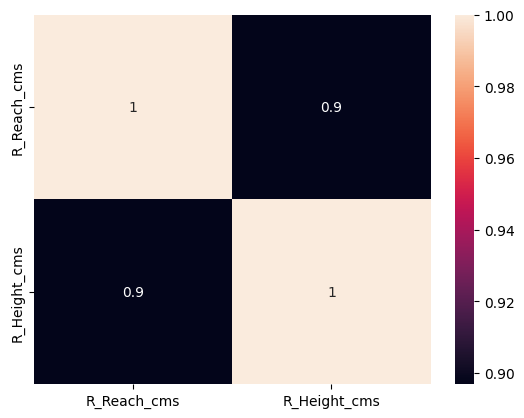

In [202]:
#correlation plot for height and reach

sns.heatmap(df[["R_Reach_cms", "R_Height_cms"]].corr(), annot=True)


<Axes: >

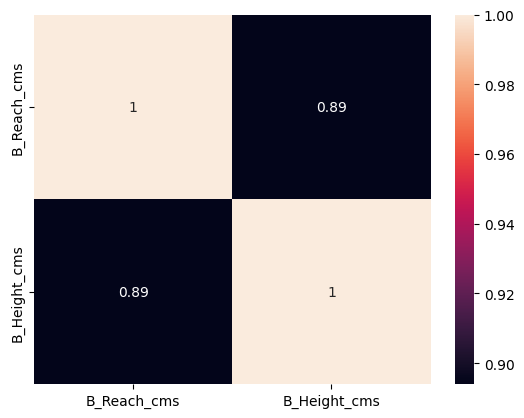

In [203]:
#correlation between reach and weight for both red and blue fighters

df[["R_Reach_cms", "R_Weight_lbs"]].corr()

df[["B_Reach_cms", "B_Weight_lbs"]].corr()

#correlation plot for reach and weight

#sns.heatmap(df[["R_Reach_cms", "R_Weight_lbs"]].corr(), annot=True)

sns.heatmap(df[["B_Reach_cms", "B_Height_cms"]].corr(), annot=True)

In [204]:
#since the correlation is high, we can fill na values in reach with the height. Reach is also the wingspan of the fighter which is usually the same as the height

df.loc[df['R_Reach_cms'].isna(), 'R_Reach_cms'] = df.loc[df['R_Reach_cms'].isna(), 'R_Height_cms']
df.loc[df['B_Reach_cms'].isna(), 'B_Reach_cms'] = df.loc[df['B_Reach_cms'].isna(), 'B_Height_cms']


In [205]:
df['B_Reach_cms'].isna().sum()

0

In [206]:
df.isna().sum()

Winner             0
title_bout         0
weight_class       0
no_of_rounds       0
B_avg_KD        1661
                ... 
R_Height_cms       0
R_Reach_cms        0
R_Weight_lbs       0
B_age            172
R_age             82
Length: 140, dtype: int64

In [207]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7700,7701,7702,7703,7704,7705,7706,7707,7708,7709
Winner,Red,Red,Blue,Red,Blue,Blue,Blue,Blue,Red,Blue,...,Red,Red,Red,Red,Red,Red,Red,Red,Red,Red
title_bout,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
weight_class,Middleweight,Welterweight,Light Heavyweight,Light Heavyweight,Women's Bantamweight,Catch Weight,Featherweight,Featherweight,Bantamweight,Bantamweight,...,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R_Height_cms,187.96,190.5,193.04,193.04,167.64,170.18,175.26,172.72,177.8,167.64,...,185.42,182.88,185.42,180.34,190.5,177.8,182.88,187.96,186.226824,177.8
R_Reach_cms,190.5,187.96,193.04,200.66,167.64,180.34,175.26,177.8,177.8,175.26,...,185.42,182.88,185.42,180.34,190.5,177.8,182.88,187.96,186.226824,177.8
R_Weight_lbs,185.0,170.0,205.0,205.0,135.0,145.0,145.0,145.0,135.0,135.0,...,175.0,210.0,175.0,190.0,260.0,170.0,210.0,225.0,225.635294,210.0
B_age,34.0,37.0,35.0,31.0,32.0,29.0,27.0,34.0,29.0,28.0,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0


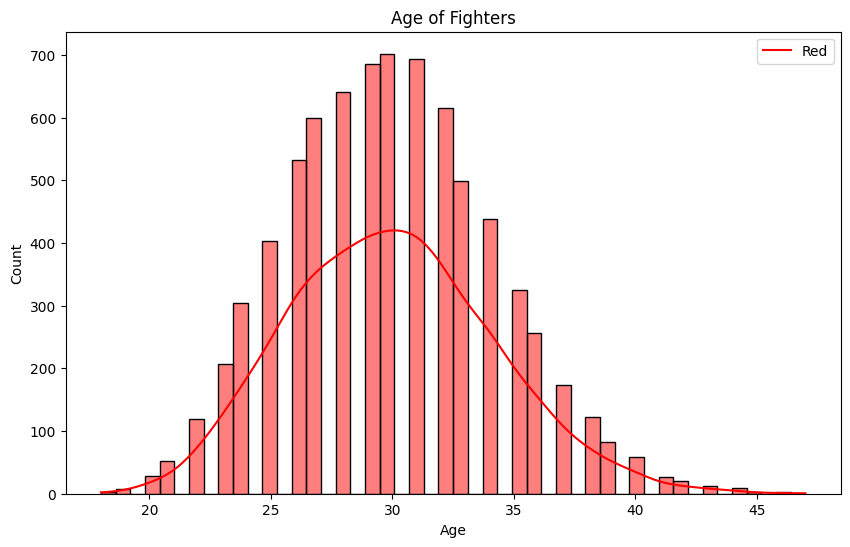

In [208]:
#plot of age in red and blue fighters

plt.figure(figsize=(10, 6))
sns.histplot(df["R_age"], color="red", kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age of Fighters")
plt.legend(["Red"])
plt.show()

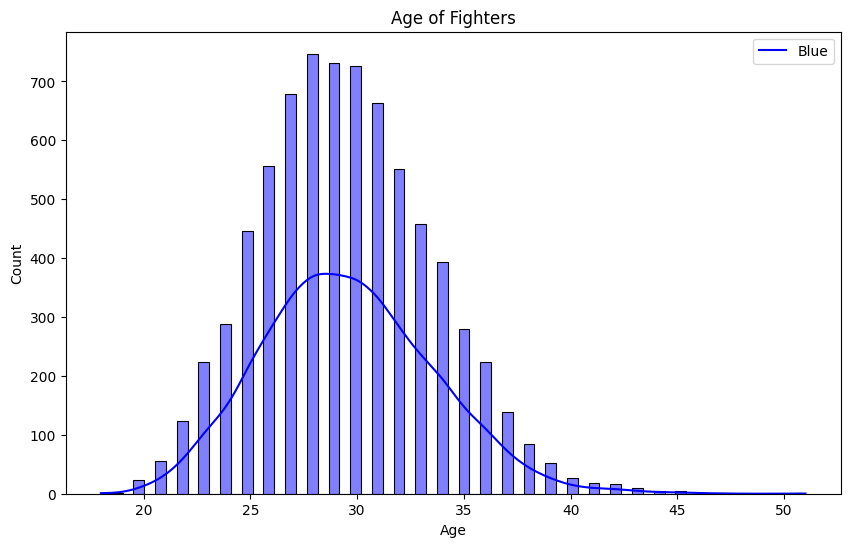

In [209]:
#plot of age in red and blue fighters

plt.figure(figsize=(10, 6))
sns.histplot(df["B_age"], color="blue", kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age of Fighters")
plt.legend(["Blue"])
plt.show()

In [210]:
#the age distribution looks like a normal distribution so we can fill na values with the median of the age because its robust to outliers

# df.loc[df["R_age"].isna(), "R_age"] = df["R_age"].median()
# df.loc[df["B_age"].isna(), "B_age"] = df["B_age"].median()

df = df.dropna(subset=["R_age", "B_age"])

In [211]:
null_columns = df.columns[df.isnull().any()]

print("Columns with null values:")
for column in null_columns:
    print(f"{column}: {df[column].isnull().sum()} null values")

Columns with null values:
B_avg_KD: 1535 null values
B_avg_opp_KD: 1535 null values
B_avg_SIG_STR_pct: 1535 null values
B_avg_opp_SIG_STR_pct: 1535 null values
B_avg_TD_pct: 1535 null values
B_avg_opp_TD_pct: 1535 null values
B_avg_SUB_ATT: 1535 null values
B_avg_opp_SUB_ATT: 1535 null values
B_avg_REV: 1535 null values
B_avg_opp_REV: 1535 null values
B_avg_SIG_STR_att: 1535 null values
B_avg_SIG_STR_landed: 1535 null values
B_avg_opp_SIG_STR_att: 1535 null values
B_avg_opp_SIG_STR_landed: 1535 null values
B_avg_TOTAL_STR_att: 1535 null values
B_avg_TOTAL_STR_landed: 1535 null values
B_avg_opp_TOTAL_STR_att: 1535 null values
B_avg_opp_TOTAL_STR_landed: 1535 null values
B_avg_TD_att: 1535 null values
B_avg_TD_landed: 1535 null values
B_avg_opp_TD_att: 1535 null values
B_avg_opp_TD_landed: 1535 null values
B_avg_HEAD_att: 1535 null values
B_avg_HEAD_landed: 1535 null values
B_avg_opp_HEAD_att: 1535 null values
B_avg_opp_HEAD_landed: 1535 null values
B_avg_BODY_att: 1535 null values
B_avg

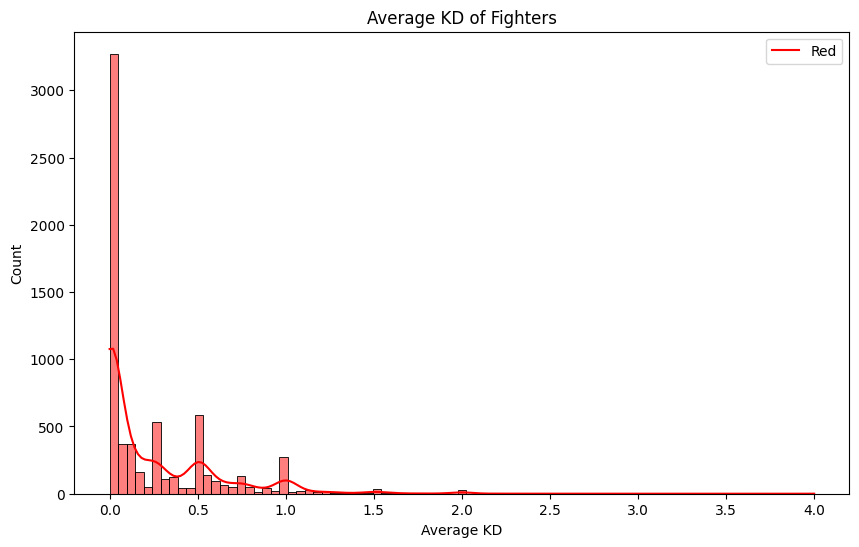

In [212]:
#plot for avg kd for red and blue fighters

plt.figure(figsize=(10, 6))
sns.histplot(df["R_avg_KD"], color="red", kde=True)
plt.xlabel("Average KD")
plt.ylabel("Count")
plt.title("Average KD of Fighters")
plt.legend(["Red"])
plt.show()

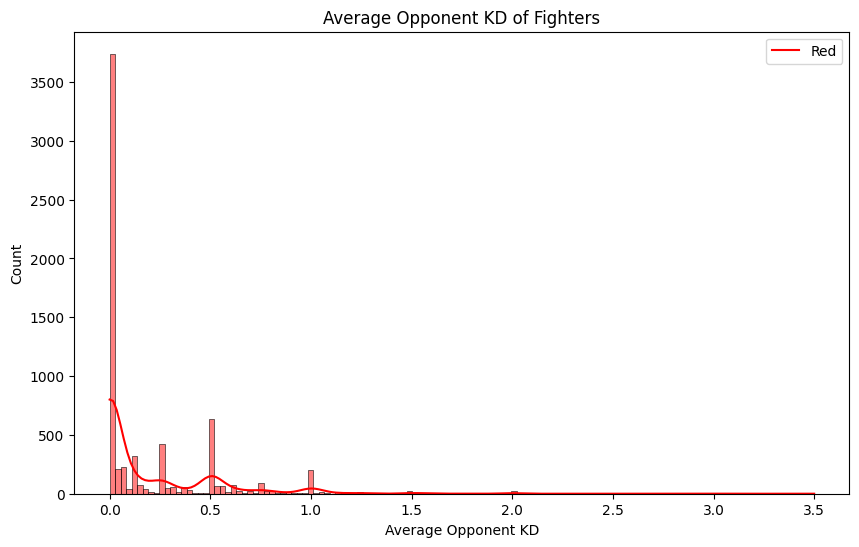

In [213]:
#plotting R_avg_opp_KD

plt.figure(figsize=(10, 6))
sns.histplot(df["R_avg_opp_KD"], color="red", kde=True)
plt.xlabel("Average Opponent KD")
plt.ylabel("Count")
plt.title("Average Opponent KD of Fighters")
plt.legend(["Red"])

plt.show()

In [214]:
numerical_columns = df[null_columns].select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df[null_columns].select_dtypes(include=['object']).columns

In [215]:
#categorical columns names
categorical_columns

Index(['B_Stance', 'R_Stance'], dtype='object')

In [216]:
#since median is robust to ouytliers, we can fill na values in numerical columns with the mean of the column

for col in numerical_columns:
    #df[col].fillna(df[col].median(), inplace=True)
    df.loc[df[col].isna(), col] = df[col].median()

for col in categorical_columns:
    #df[col].fillna(df[col].mode()[0], inplace=True)
    df.loc[df[col].isna(), col] = df[col].mode()[0]

In [217]:
null_columns = df.columns[df.isnull().any()]

print("Columns with null values:")
for column in null_columns:
    print(f"{column}: {df[column].isnull().sum()} null values")

Columns with null values:


In [218]:
df['B_Stance'].value_counts()

B_Stance
Orthodox       5628
Southpaw       1457
Switch          400
Open Stance       7
Sideways          1
Name: count, dtype: int64

In [219]:
df['R_Stance'].value_counts()

R_Stance
Orthodox       5628
Southpaw       1494
Switch          356
Open Stance      15
Name: count, dtype: int64

In [220]:
#converting categorical to numerical with one hot encoding

#df = pd.concat([df, pd.get_dummies(df[["weight_class"]], prefix="weight_class")], axis=1)
df = pd.concat([df, pd.get_dummies(df[["B_Stance"]], prefix="B_Stance")], axis=1)
df = pd.concat([df, pd.get_dummies(df[["R_Stance"]], prefix="R_Stance")], axis=1)

df.drop(columns=['weight_class', 'B_Stance', 'R_Stance'], inplace=True)

In [221]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7652,7656,7665,7672,7675,7683,7687,7692,7695,7700
Winner,Red,Red,Blue,Red,Blue,Blue,Blue,Blue,Red,Blue,...,Red,Draw,Red,Red,Draw,Red,Red,Red,Red,Red
title_bout,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,False
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,2,2,2,1,2,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.03125,0.03125,0.0,0.0
B_avg_opp_KD,0.015625,0.0,0.5,0.25,0.25,0.0,0.0,0.660652,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B_Stance_Switch,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
R_Stance_Open Stance,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
R_Stance_Orthodox,True,True,True,True,True,True,False,True,False,True,...,False,True,True,False,True,False,False,False,False,False
R_Stance_Southpaw,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,True,True,True,True,True


In [222]:
#check for categories in the Winner column

df["Winner"].value_counts()

Winner
Red     4722
Blue    2631
Draw     140
Name: count, dtype: int64

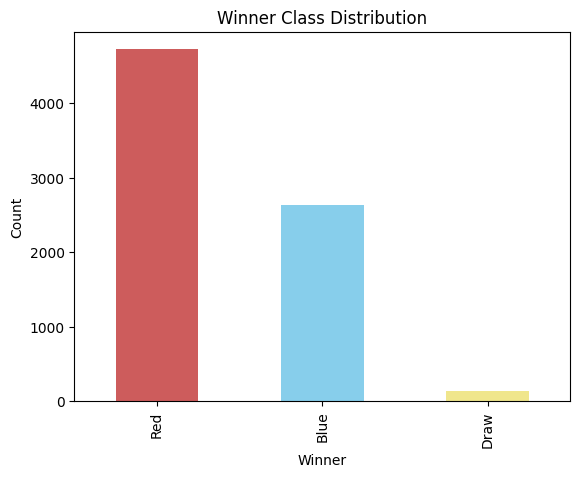

In [223]:
df['Winner'].value_counts().plot(kind='bar', color=['indianred', 'skyblue', 'khaki'])
plt.title('Winner Class Distribution')
plt.xlabel('Winner')
plt.ylabel('Count')
plt.show()

In [224]:
#dropping draw since the model will be predicting the winner and also they are very few, 143 out of 7564

df = df[df["Winner"] != "Draw"]

In [225]:
df['Winner'] = df['Winner'].replace({'Red': 0, 'Blue': 1})


df['title_bout'] = df['title_bout'].astype(int)

C:\Users\kisha\AppData\Local\Temp\ipykernel_35076\2739264854.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Winner'] = df['Winner'].replace({'Red': 0, 'Blue': 1})


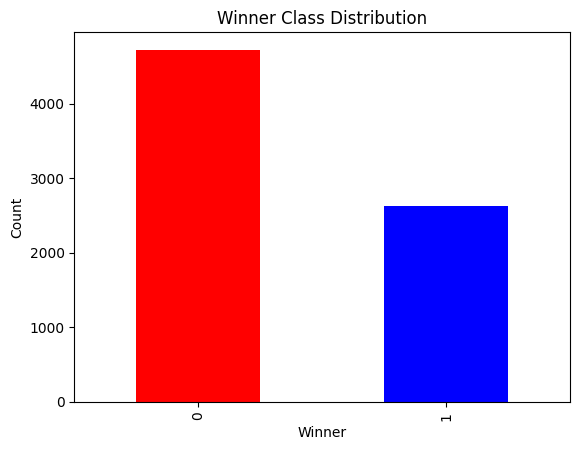

In [226]:

#checking for class imbalance using plot with 0 being red and 1 being blue

df['Winner'].value_counts().plot(kind='bar', color=['red', 'blue', 'yellow'])
plt.title('Winner Class Distribution')
plt.xlabel('Winner')
plt.ylabel('Count')
plt.show()

In [227]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7644,7651,7652,7665,7672,7683,7687,7692,7695,7700
Winner,0,0,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
title_bout,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,1,1,2,2,1,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.03125,0.5,0.0,0.0,0.0,0.0,0.03125,0.03125,0.0,0.0
B_avg_opp_KD,0.015625,0.0,0.5,0.25,0.25,0.0,0.0,0.660652,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B_Stance_Switch,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
R_Stance_Open Stance,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
R_Stance_Orthodox,True,True,True,True,True,True,False,True,False,True,...,True,True,False,True,False,False,False,False,False,False
R_Stance_Southpaw,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,True,True,True,True,True


In [228]:
df.to_csv("C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/data_cleaned_no_weight.csv", index=False)

In [229]:

X = df.drop(columns=["Winner"])
y = df["Winner"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [230]:
#LOGISTIC REGRESSION

log_reg = LogisticRegression(max_iter=10000, solver='saga')
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [231]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.65
Precision: 0.52
Recall: 0.30
F1 Score: 0.38
ROC AUC: 0.67
Confusion Matrix:
[[1596  289]
 [ 739  318]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.85      0.76      1885
           1       0.52      0.30      0.38      1057

    accuracy                           0.65      2942
   macro avg       0.60      0.57      0.57      2942
weighted avg       0.63      0.65      0.62      2942



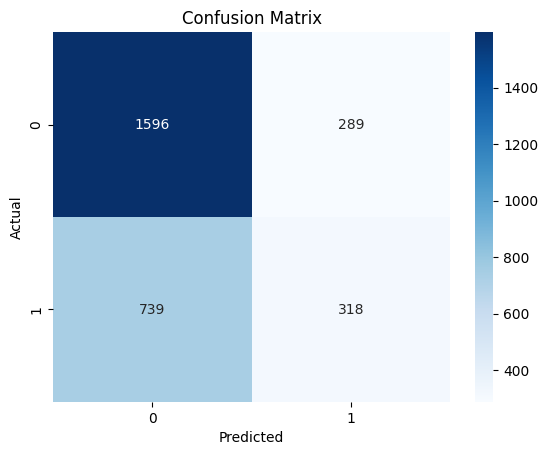

In [232]:
#plotting confusion matrix

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [233]:
#random forest

rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
y_pred_prob = rf.predict_proba(X_test_scaled)[:, 1]

#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

Accuracy: 0.65
Precision: 0.53
Recall: 0.16
F1 Score: 0.25
ROC AUC: 0.64
Confusion Matrix: [[1734  151]
 [ 884  173]]


In [234]:
#XGBoost

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)
y_pred = xgb_model.predict(X_test_scaled)
y_pred_prob = xgb_model.predict_proba(X_test_scaled)[:, 1]

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.63
Precision: 0.47
Recall: 0.30
F1 Score: 0.36
ROC AUC: 0.62
Confusion Matrix:
[[1527  358]
 [ 744  313]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.81      0.73      1885
           1       0.47      0.30      0.36      1057

    accuracy                           0.63      2942
   macro avg       0.57      0.55      0.55      2942
weighted avg       0.60      0.63      0.60      2942



In [235]:
from sklearn.neural_network import MLPClassifier

#Neural nets

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)
y_pred_prob = mlp.predict_proba(X_test_scaled)[:, 1]

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.61
Precision: 0.45
Recall: 0.39
F1 Score: 0.42
ROC AUC: 0.61
Confusion Matrix:
[[1382  503]
 [ 641  416]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.73      0.71      1885
           1       0.45      0.39      0.42      1057

    accuracy                           0.61      2942
   macro avg       0.57      0.56      0.56      2942
weighted avg       0.60      0.61      0.60      2942



USING SMOTE

In [236]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [237]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [238]:
log_reg_smote = LogisticRegression(max_iter=10000, solver='saga')
log_reg_smote.fit(X_train_scaled, y_train_resampled)

y_pred_lrsmote = log_reg_smote.predict(X_test_scaled)
y_pred_prob_lrsmote = log_reg_smote.predict_proba(X_test_scaled)[:, 1]

#evaluate the model
accuracy = accuracy_score(y_test, y_pred_lrsmote)
precision = precision_score(y_test, y_pred_lrsmote)
recall = recall_score(y_test, y_pred_lrsmote)
f1 = f1_score(y_test, y_pred_lrsmote)
roc_auc = roc_auc_score(y_test, y_pred_prob_lrsmote)
conf_matrix = confusion_matrix(y_test, y_pred_lrsmote)
class_report = classification_report(y_test, y_pred_lrsmote)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.65
Precision: 0.52
Recall: 0.36
F1 Score: 0.43
ROC AUC: 0.66
Confusion Matrix:
[[1529  356]
 [ 675  382]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.81      0.75      1885
           1       0.52      0.36      0.43      1057

    accuracy                           0.65      2942
   macro avg       0.61      0.59      0.59      2942
weighted avg       0.63      0.65      0.63      2942



In [239]:
#random forest

rf_smote = RandomForestClassifier()
rf_smote.fit(X_train_scaled, y_train_resampled)
y_pred_rfsmote = rf_smote.predict(X_test_scaled)

#evaluate the model

accuracy = accuracy_score(y_test, y_pred_rfsmote)
precision = precision_score(y_test, y_pred_rfsmote)
recall = recall_score(y_test, y_pred_rfsmote)
f1 = f1_score(y_test, y_pred_rfsmote)
roc_auc = roc_auc_score(y_test, y_pred_rfsmote)

conf_matrix_rf_smote = confusion_matrix(y_test, y_pred_rfsmote)
class_report_rf_smote = classification_report(y_test, y_pred_rfsmote)

print(f"Accuracy: {accuracy:}")
print(f"Precision: {precision:}")
print(f"Recall: {recall:}")
print(f"F1 Score: {f1:}")
print(f"ROC AUC: {roc_auc:}")
print("Confusion Matrix:")
print(conf_matrix_rf_smote)
print("Classification Report:")
print(class_report_rf_smote)

Accuracy: 0.6366417403127125
Precision: 0.49246231155778897
Recall: 0.3708609271523179
F1 Score: 0.423097679438748
ROC AUC: 0.5782686598626311
Confusion Matrix:
[[1481  404]
 [ 665  392]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.79      0.73      1885
           1       0.49      0.37      0.42      1057

    accuracy                           0.64      2942
   macro avg       0.59      0.58      0.58      2942
weighted avg       0.62      0.64      0.62      2942



In [165]:
#xgb with smote

xgb_model_smote = xgb.XGBClassifier()
xgb_model_smote.fit(X_train_scaled, y_train_resampled)
y_pred_xgb_smote = xgb_model_smote.predict(X_test_scaled)
y_pred_prob_xgb_smote = xgb_model_smote.predict_proba(X_test_scaled)[:, 1]

# evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb_smote)
precision = precision_score(y_test, y_pred_xgb_smote)
recall = recall_score(y_test, y_pred_xgb_smote)
f1 = f1_score(y_test, y_pred_xgb_smote)
roc_auc = roc_auc_score(y_test, y_pred_prob_xgb_smote)
conf_matrix = confusion_matrix(y_test, y_pred_xgb_smote)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.63
Precision: 0.48
Recall: 0.38
F1 Score: 0.43
ROC AUC: 0.63
Confusion Matrix:
[[1454  431]
 [ 655  402]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.79      0.74      1885
           1       0.50      0.37      0.43      1057

    accuracy                           0.64      2942
   macro avg       0.59      0.58      0.58      2942
weighted avg       0.62      0.64      0.63      2942



In [166]:
#neural nets with smote

mlp_smote = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
mlp_smote.fit(X_train_scaled, y_train_resampled)
y_pred_mlp_smote = mlp_smote.predict(X_test_scaled)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred_mlp_smote)
precision = precision_score(y_test, y_pred_mlp_smote)
recall = recall_score(y_test, y_pred_mlp_smote)
f1 = f1_score(y_test, y_pred_mlp_smote)
roc_auc = roc_auc_score(y_test, y_pred_prob_xgb_smote)
conf_matrix = confusion_matrix(y_test, y_pred_mlp_smote)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.62
Precision: 0.47
Recall: 0.43
F1 Score: 0.45
ROC AUC: 0.63
Confusion Matrix:
[[1372  513]
 [ 601  456]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.79      0.74      1885
           1       0.50      0.37      0.43      1057

    accuracy                           0.64      2942
   macro avg       0.59      0.58      0.58      2942
weighted avg       0.62      0.64      0.63      2942



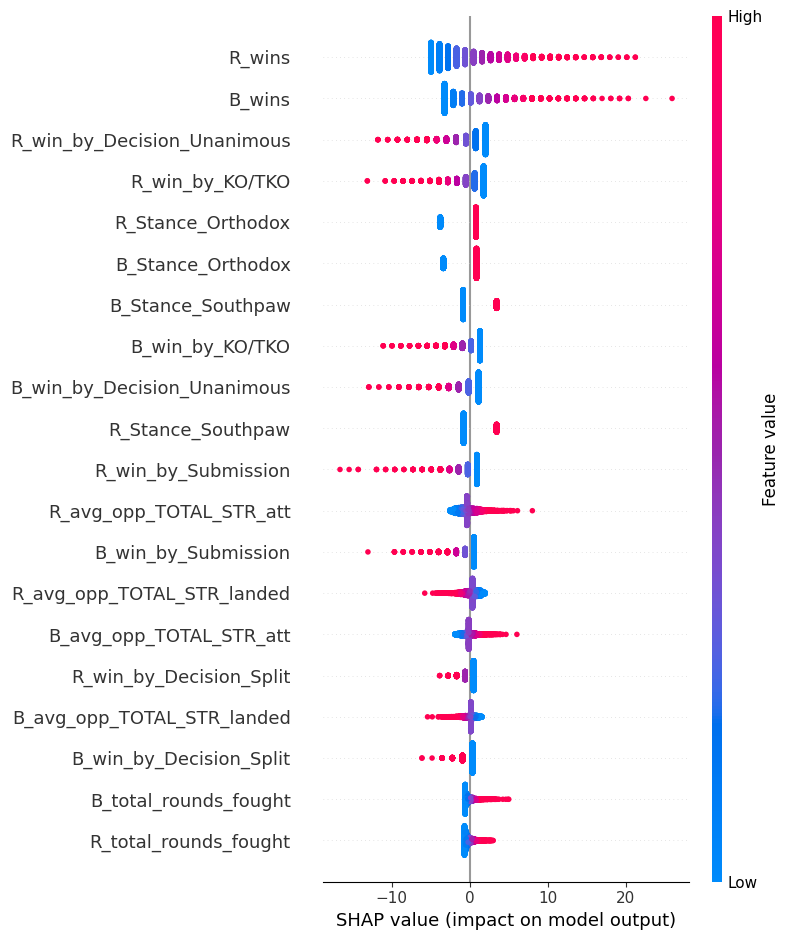

In [167]:
explainer = shap.LinearExplainer(log_reg_smote, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)

shap.summary_plot(shap_values, X_test_scaled_df)


In [168]:
log_reg_undersamp = LogisticRegression(max_iter=1000, solver='lbfgs')
log_reg_undersamp.fit(X_train_scaled, y_train_resampled)

#predict on the test set
y_pred_lrunder = log_reg_undersamp.predict(X_test_scaled)
y_pred_prob_lrunder = log_reg_undersamp.predict_proba(X_test_scaled)[:, 1]

#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred_lrunder)
recall = recall_score(y_test, y_pred_lrunder)
f1 = f1_score(y_test, y_pred_lrunder)
roc_auc = roc_auc_score(y_test, y_pred_prob_lrunder)
conf_matrix = confusion_matrix(y_test, y_pred_lrunder)
class_report = classification_report(y_test, y_pred_lrunder)

#print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.61
Precision: 0.52
Recall: 0.36
F1 Score: 0.43
ROC AUC: 0.66
Confusion Matrix:
[[1532  353]
 [ 675  382]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.81      0.75      1885
           1       0.52      0.36      0.43      1057

    accuracy                           0.65      2942
   macro avg       0.61      0.59      0.59      2942
weighted avg       0.63      0.65      0.63      2942



HYPER PARAMETER TUNING WITH SMOTE
----------------------------------

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

#smote
smote = SMOTE(random_state=42)
X_train_resampled, y_train = smote.fit_resample(X_train, y_train)

#standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [ ]:
param_grid_lr = {
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'C': [0.1, 1, 10, 100],
    'class_weight': [None, 'balanced'],
    'penalty': ['l1', 'l2'],
    'max_iter': [1000, 10000]
}

grid_search = GridSearchCV(LogisticRegression(max_iter=10000), param_grid_lr, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

In [171]:
best_model_lr = grid_search.best_estimator_

#predict on the test set
y_pred = best_model_lr.predict(X_test_scaled)
y_pred_prob = best_model_lr.predict_proba(X_test_scaled)[:, 1]


#print evaluation metrics
print(f"Best Parameters: {grid_search.best_params_}")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(f"Precision:", precision_score(y_test, y_pred))
print(f"Recall:", recall_score(y_test, y_pred))
print(f"F1 Score:", f1_score(y_test, y_pred))
print(f"ROC AUC: ", roc_auc_score(y_test, y_pred_prob))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'C': 0.1, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.6604350781781101
Precision: 0.5316901408450704
Recall: 0.4301994301994302
F1 Score: 0.4755905511811024
ROC AUC:  0.6723877982039267
Confusion Matrix:
[[1490  399]
 [ 600  453]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      1889
           1       0.53      0.43      0.48      1053

    accuracy                           0.66      2942
   macro avg       0.62      0.61      0.61      2942
weighted avg       0.65      0.66      0.65      2942



In [172]:
import joblib

joblib.dump(best_model_lr, "C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/DS-UoN-Sports-ML-bhamidipati/savedModels/best_model_lr.pkl")

['C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/DS-UoN-Sports-ML-bhamidipati/savedModels/best_model_lr.pkl']

In [173]:
#random forest grid search

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

#predict on the test set
y_pred_rf_gs = best_model.predict(X_test_scaled)
y_pred_prob_rf_gs = best_model.predict_proba(X_test_scaled)[:, 1]

#print evaluation metrics
print(f"Best Parameters: {grid_search.best_params_}")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_gs))
print(f"Precision:", precision_score(y_test, y_pred_rf_gs))
print(f"Recall:", recall_score(y_test, y_pred_rf_gs))
print(f"F1 Score:", f1_score(y_test, y_pred_rf_gs))
print(f"ROC AUC: ", roc_auc_score(y_test, y_pred_prob_rf_gs))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_gs))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf_gs))


Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.6393609789259007
Precision: 0.49483204134366926
Recall: 0.3637226970560304
F1 Score: 0.4192665571975917
ROC AUC:  0.6456317049223348
Confusion Matrix:
[[1498  391]
 [ 670  383]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.79      0.74      1889
           1       0.49      0.36      0.42      1053

    accuracy                           0.64      2942
   macro avg       0.59      0.58      0.58      2942
weighted avg       0.62      0.64      0.62      2942



In [174]:
joblib.dump(best_model, "C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/DS-UoN-Sports-ML-bhamidipati/savedModels/best_model_rf.pkl")

['C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/DS-UoN-Sports-ML-bhamidipati/savedModels/best_model_rf.pkl']

In [175]:
#grid search for xgb

xgb_params = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 400],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'alpha': [0, 0.5, 1],
    'lambda': [1, 1.5, 2]
}

grid_search_xgb = RandomizedSearchCV(xgb.XGBClassifier(), xgb_params, cv=5, scoring='f1', n_iter=100)
grid_search_xgb.fit(X_train_scaled, y_train)

best_model_xgb = grid_search_xgb.best_estimator_

#predict on the test set
y_pred_xgb_gs = best_model_xgb.predict(X_test_scaled)
y_pred_prob_xgb_gs = best_model_xgb.predict_proba(X_test_scaled)[:, 1]

#print evaluation metrics
print(f"Best Parameters: {grid_search_xgb.best_params_}")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_gs))
print(f"Precision:", precision_score(y_test, y_pred_xgb_gs))
print(f"Recall:", recall_score(y_test, y_pred_xgb_gs))
print(f"F1 Score:", f1_score(y_test, y_pred_xgb_gs))
print(f"ROC AUC: ", roc_auc_score(y_test, y_pred_prob_xgb_gs))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb_gs))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb_gs))


Best Parameters: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.05, 'lambda': 2, 'gamma': 0.2, 'colsample_bytree': 0.8, 'alpha': 0.5}
Accuracy: 0.6475186947654656
Precision: 0.5098765432098765
Recall: 0.3922127255460589
F1 Score: 0.4433709071390231
ROC AUC:  0.6605026250341232
Confusion Matrix:
[[1492  397]
 [ 640  413]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      1889
           1       0.51      0.39      0.44      1053

    accuracy                           0.65      2942
   macro avg       0.60      0.59      0.59      2942
weighted avg       0.63      0.65      0.64      2942



In [176]:
joblib.dump(best_model_xgb, "C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/DS-UoN-Sports-ML-bhamidipati/savedModels/best_model_xgb.pkl")

['C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/DS-UoN-Sports-ML-bhamidipati/savedModels/best_model_xgb.pkl']

In [177]:
#gauusian naive bayes 

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)
y_pred_prob_nb = nb.predict_proba(X_test_scaled)[:, 1]

#evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(f"Precision:", precision_score(y_test, y_pred_nb))
print(f"Recall:", recall_score(y_test, y_pred_nb))
print(f"F1 Score:", f1_score(y_test, y_pred_nb))
print(f"ROC AUC: ", roc_auc_score(y_test, y_pred_prob_nb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))


Accuracy: 0.42692046227056424
Precision: 0.37191420477539455
Recall: 0.8727445394112061
F1 Score: 0.521566401816118
ROC AUC:  0.5812747565879735
Confusion Matrix:
[[ 337 1552]
 [ 134  919]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.18      0.29      1889
           1       0.37      0.87      0.52      1053

    accuracy                           0.43      2942
   macro avg       0.54      0.53      0.40      2942
weighted avg       0.59      0.43      0.37      2942



In [178]:
#gradient boosting with grid search

gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5]
}


grid_search_gb = GridSearchCV(GradientBoostingClassifier(), gb_params, cv=5, scoring='f1')
grid_search_gb.fit(X_train_scaled, y_train)

best_model_gb = grid_search_gb.best_estimator_

#predict on the test set
y_pred_gb_gs = best_model_gb.predict(X_test_scaled)
y_pred_prob_gb_gs = best_model_gb.predict_proba(X_test_scaled)[:, 1]

#print evaluation metrics
print(f"Best Parameters: {grid_search_gb.best_params_}")
print("Accuracy:", accuracy_score(y_test, y_pred_gb_gs))
print(f"Precision:", precision_score(y_test, y_pred_gb_gs))
print(f"Recall:", recall_score(y_test, y_pred_gb_gs))
print(f"F1 Score:", f1_score(y_test, y_pred_gb_gs))
print(f"ROC AUC: ", roc_auc_score(y_test, y_pred_prob_gb_gs))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb_gs))
print("Classification Report:")
print(classification_report(y_test, y_pred_gb_gs))



Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Accuracy: 0.6410605030591434
Precision: 0.4982973893303065
Recall: 0.41690408357075026
F1 Score: 0.45398138572905894
ROC AUC:  0.6362385923000005
Confusion Matrix:
[[1447  442]
 [ 614  439]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      1889
           1       0.50      0.42      0.45      1053

    accuracy                           0.64      2942
   macro avg       0.60      0.59      0.59      2942
weighted avg       0.63      0.64      0.63      2942



In [179]:
joblib.dump(best_model_gb, "C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/DS-UoN-Sports-ML-bhamidipati/savedModels/best_model_gb.pkl")

['C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/DS-UoN-Sports-ML-bhamidipati/savedModels/best_model_gb.pkl']

In [180]:
#voting classifier

voting_clf = VotingClassifier(estimators=[
    ('log_reg', best_model_lr),
    ('rf', best_model),
    ('xgb', best_model_xgb),
    ('nb', nb),
    ('gb', best_model_gb)
], voting='soft')

voting_clf.fit(X_train_scaled, y_train)

y_pred_voting = voting_clf.predict(X_test_scaled)
y_pred_prob_voting = voting_clf.predict_proba(X_test_scaled)[:, 1]

#evaluate the model 
print("Accuracy:", accuracy_score(y_test, y_pred_voting))
print(f"Precision:", precision_score(y_test, y_pred_voting))
print(f"Recall:", recall_score(y_test, y_pred_voting))
print(f"F1 Score:", f1_score(y_test, y_pred_voting))
print(f"ROC AUC: ", roc_auc_score(y_test, y_pred_prob_voting))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_voting))
print("Classification Report:")
print(classification_report(y_test, y_pred_voting))



Accuracy: 0.6267845003399048
Precision: 0.48299319727891155
Recall: 0.6068376068376068
F1 Score: 0.5378787878787878
ROC AUC:  0.6565636913263523
Confusion Matrix:
[[1205  684]
 [ 414  639]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.64      0.69      1889
           1       0.48      0.61      0.54      1053

    accuracy                           0.63      2942
   macro avg       0.61      0.62      0.61      2942
weighted avg       0.65      0.63      0.63      2942



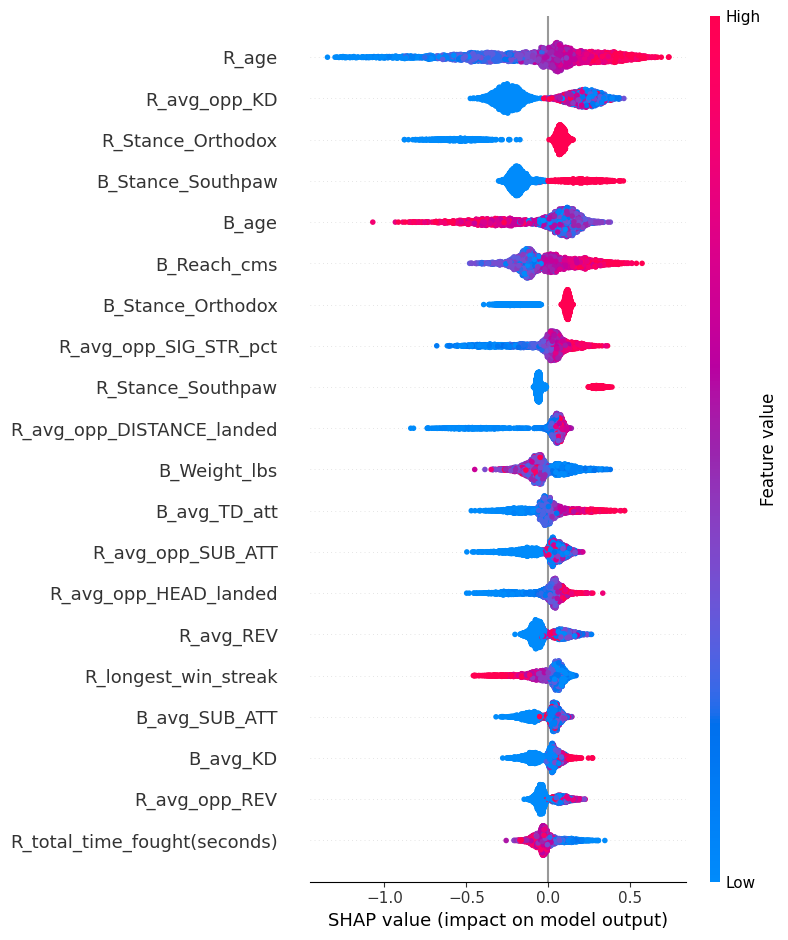

In [181]:
voting_explainer = shap.TreeExplainer(voting_clf.estimators_[2])
voting_shap_values = voting_explainer.shap_values(X_test_scaled)

shap.summary_plot(voting_shap_values, X_test_scaled, feature_names=X_train.columns)


In [253]:
#chewcking weights of the models in the voting classifier

weights = voting_clf.named_estimators_.keys()
weights


dict_keys(['log_reg', 'rf', 'xgb', 'nb', 'gb'])

In [254]:
for name, model in voting_clf.named_estimators_.items():
    model_predictions = model.predict(X_test)
    agreement_score = accuracy_score(y_test, model_predictions == voting_clf.predict(X_test))
    print(f"{name} model agreement with ensemble: {agreement_score}")

C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
C:\Users\kisha\AppData\Roaming\Python\Python31

log_reg model agreement with ensemble: 0.3776342624065262
rf model agreement with ensemble: 0.3786539768864718


C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
C:\Users\kisha\AppData\Roaming\Python\Python312\site-p

xgb model agreement with ensemble: 0.3970088375254929
nb model agreement with ensemble: 0.3664174031271244
gb model agreement with ensemble: 0.398368456832087


C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\kisha\AppData\Roaming\Python\

In [255]:
for name, model in voting_clf.named_estimators_.items():
    temp_ensemble = VotingClassifier(estimators=[(n, m) for n, m in voting_clf.named_estimators_.items() if n != name], voting='soft')
    temp_ensemble.fit(X_train, y_train)
    temp_score = temp_ensemble.score(X_test, y_test)
    print(f"Performance without {name}: {temp_score}")

Performance without log_reg: 0.6335825968728755


C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Performance without rf: 0.6434398368456832


C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Performance without xgb: 0.636981645139361


C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Performance without nb: 0.6481985044187627


C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Performance without gb: 0.6403806934058464


In [182]:
joblib.dump(voting_clf, "C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/DS-UoN-Sports-ML-bhamidipati/savedModels/voting_clf.pkl")

['C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/DS-UoN-Sports-ML-bhamidipati/savedModels/voting_clf.pkl']

In [240]:
voting_clf_explainer = shap.KernelExplainer(voting_clf.predict_proba, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)


Using 5674 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


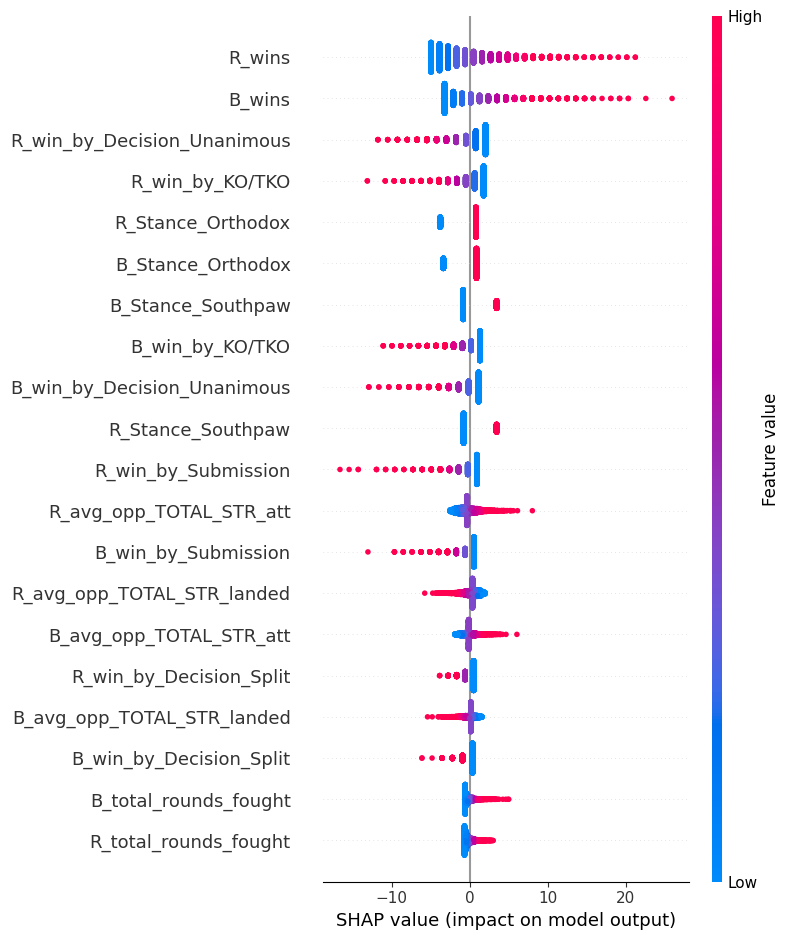

In [242]:
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)


SHAPLEY VALUES
--------------------------------------------------

In [ ]:
#shapley values for the random forest model
from shap import TreeExplainer


explainer_rf_new = TreeExplainer(rf)

shap_values_rf_new = explainer_rf_new.shap_values(X_train)

shap_rf_array_new = np.array(shap_values_rf_new)

In [ ]:
print(shap_rf_array_new.shape)

(5674, 159, 2)


In [ ]:
shap_values_class_1 = shap_rf_array_new[:, :, 0]

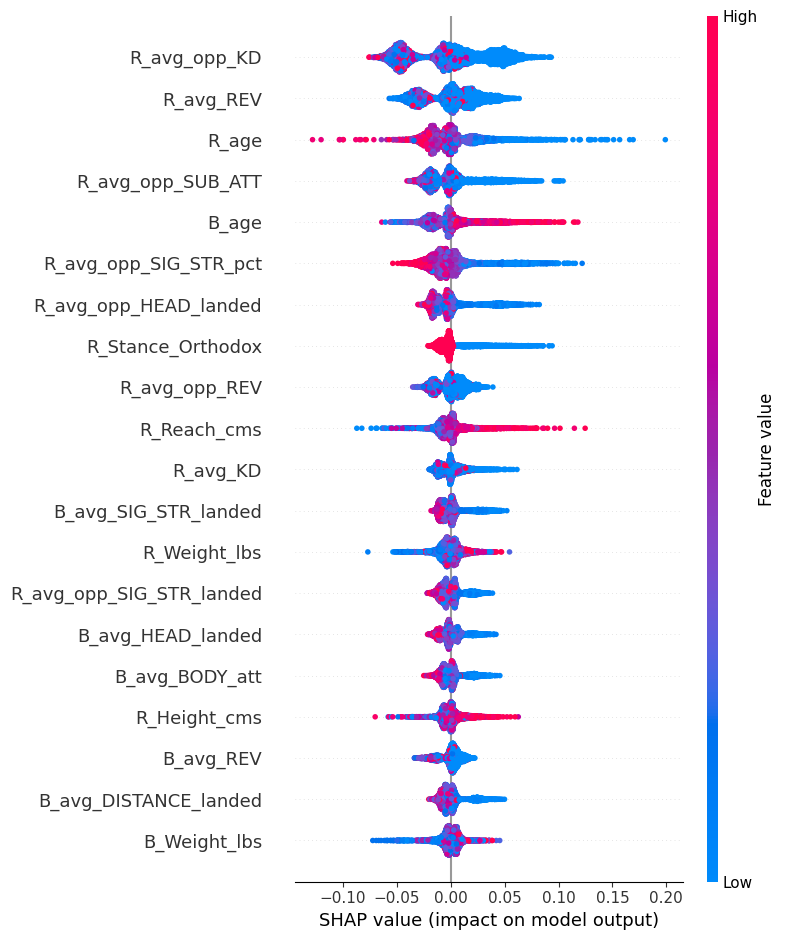

In [ ]:
shap.summary_plot(shap_values_class_1, X_train, feature_names=X.columns)

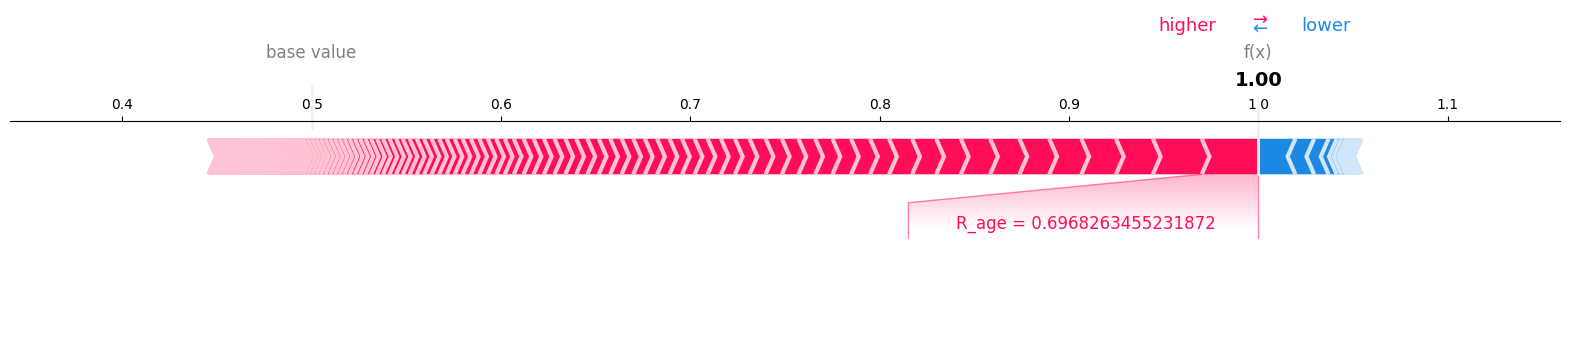

In [ ]:
base_value_rf1 = explainer_rf_new.expected_value[1]

instance_index = 0

shap_values_for_instance = shap_values_class_1[instance_index, :]


shap.force_plot(
    base_value_rf1, 
    shap_values_for_instance, 
    X_train[instance_index, :], 
    feature_names=X.columns,
    matplotlib=True
)

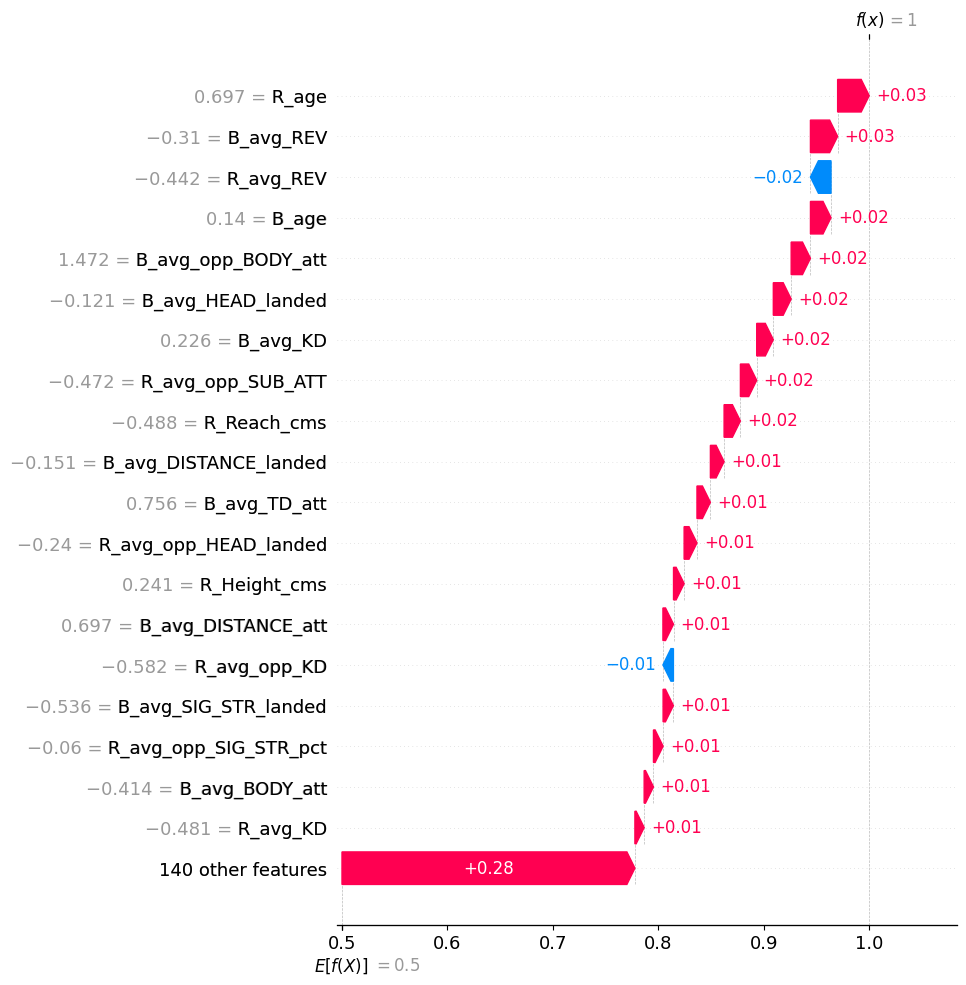

In [ ]:
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values_for_instance, 
        base_values=explainer_rf_new.expected_value[1],  # Base value for class 1
        data=X_train[instance_index, :], 
        feature_names=X.columns
    ),
    max_display=20  # Adjust the number of features to display if necessary
)

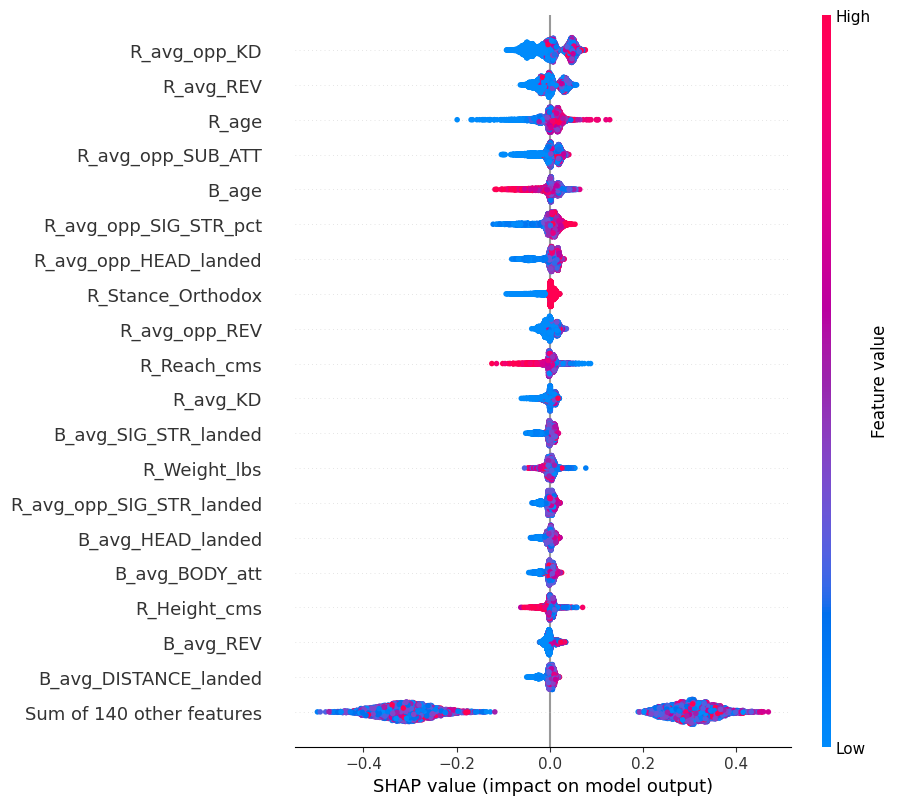

In [ ]:
#beeswarm plot

shap_values_reshaped_rf = shap_rf_array_new.reshape(X_train.shape[0], X_train.shape[1], 2)

shap_values_for_class_0 = shap_values_reshaped_rf[:, :, 1]

shap_values_explanation_rf = shap.Explanation(
    values=shap_values_for_class_0,
    base_values=explainer_rf_new.expected_value, 
    data=X_train, 
    feature_names=X.columns
)

shap.plots.beeswarm(shap_values_explanation_rf, max_display=20)

In [ ]:
best_xgb = best_model_xgb

In [ ]:
#shapley values for the best model
explainer_xgb = shap.TreeExplainer(best_xgb)

shap_values_xgb = explainer_xgb.shap_values(X_train)

shap.summary_plot(shap_values_xgb, X_train, feature_names=X.columns)



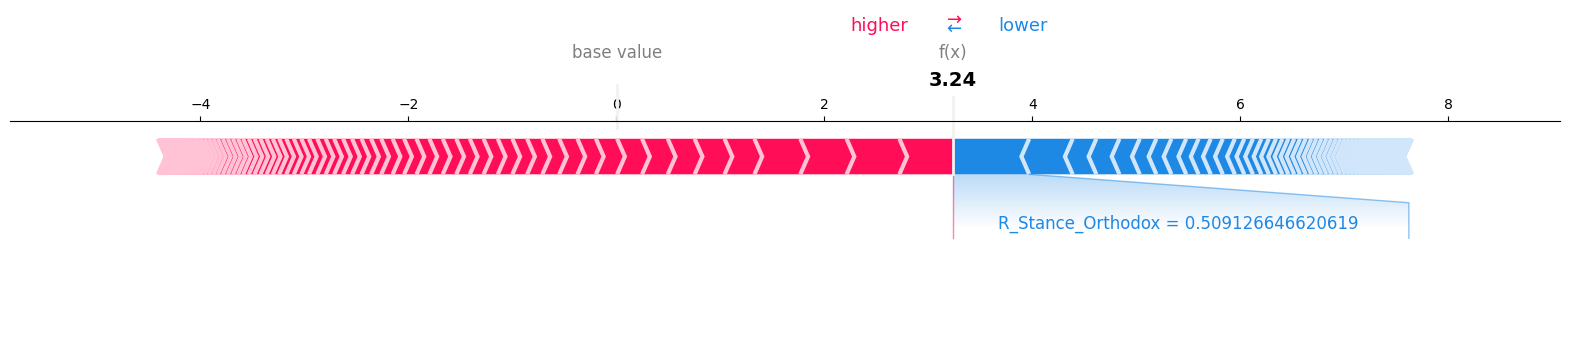

In [ ]:
#FORCE PLOT

xgb_forceplot= shap.force_plot(
    explainer_xgb.expected_value, 
    shap_values_xgb[0, :], 
    X_train[0, :], 
    feature_names=X.columns, 
    matplotlib=True
)

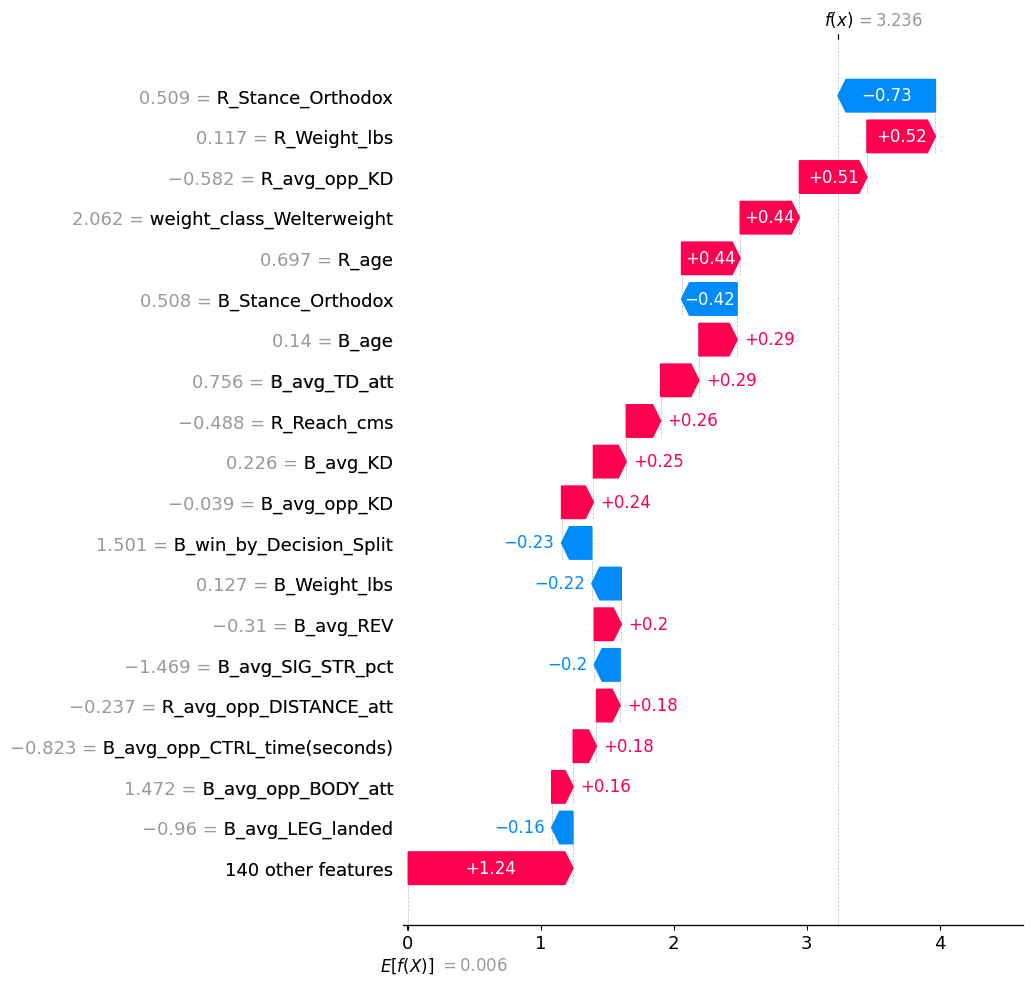

In [ ]:
#waterfall plot
#epxlaination

shap_values_explanation_xgb = shap.Explanation(values=shap_values_xgb,
                                             base_values=explainer_xgb.expected_value,
                                             data=X_train,
                                             feature_names=X.columns)

shap.plots.waterfall(shap_values_explanation_xgb[0], max_display=20)

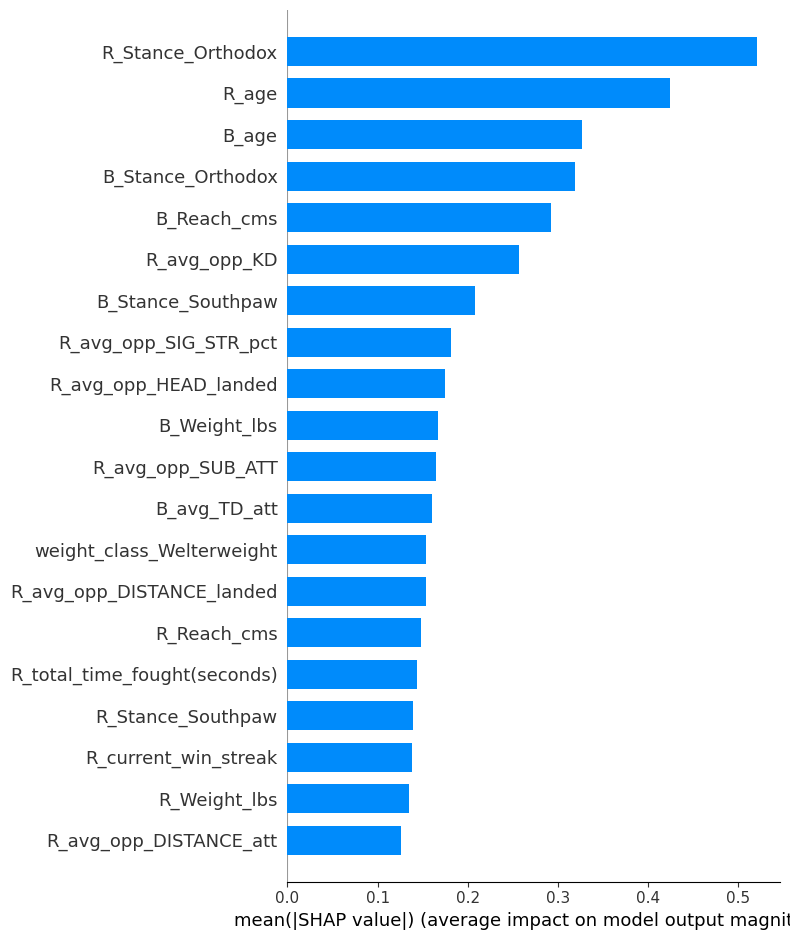

In [ ]:
#bar plot


shap.summary_plot(shap_values_xgb, X_train, feature_names=X.columns, plot_type='bar', max_display=20)

In [ ]:
#random forest grid search

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search_rf_bal = GridSearchCV(RandomForestClassifier(class_weight="balanced_subsample"), param_grid, cv=5, scoring='f1')
grid_search_rf_bal.fit(X_train_scaled, y_train)

best_model_rf_bal = grid_search_rf_bal.best_estimator_

#predict on the test set
y_pred_rf_gs_bal = best_model_rf_bal.predict(X_test_scaled)
y_pred_prob_rf_gs_bal = best_model_rf_bal.predict_proba(X_test_scaled)[:, 1]

#print evaluation metrics
print(f"Best Parameters: {grid_search_rf_bal.best_params_}")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_gs_bal))
print(f"Precision:", precision_score(y_test, y_pred_rf_gs_bal))
print(f"Recall:", recall_score(y_test, y_pred_rf_gs_bal))
print(f"F1 Score:", f1_score(y_test, y_pred_rf_gs_bal))
print(f"ROC AUC: ", roc_auc_score(y_test, y_pred_prob_rf_gs_bal))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_gs_bal))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf_gs_bal))

In [48]:
rf_model = RandomForestClassifier(class_weight='balanced_subsample', random_state=42)
rf_model.fit(X_train_scaled, y_train)

#predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

#evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

#print evaluation metrics
print("Random Forest Classifier")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")
print(f"ROC AUC: {roc_auc_rf:.2f}")
print("Confusion Matrix:")
print(conf_matrix_rf)
print("Classification Report:")
print(class_report_rf)

Random Forest Classifier
Accuracy: 0.64
Precision: 0.50
Recall: 0.15
F1 Score: 0.23
ROC AUC: 0.63
Confusion Matrix:
[[1738  151]
 [ 899  154]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.92      0.77      1889
           1       0.50      0.15      0.23      1053

    accuracy                           0.64      2942
   macro avg       0.58      0.53      0.50      2942
weighted avg       0.60      0.64      0.57      2942



In [49]:
#random forest with k fold cross validation

rf_model_kf = RandomForestClassifier(class_weight='balanced_subsample', random_state=42)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = cross_val_score(rf_model_kf, X_train_scaled, y_train, cv=cv, scoring='accuracy')
precision_scores = cross_val_score(rf_model_kf, X_train_scaled, y_train, cv=cv, scoring='precision')
recall_scores = cross_val_score(rf_model_kf, X_train_scaled, y_train, cv=cv, scoring='recall')
f1_scores = cross_val_score(rf_model_kf, X_train_scaled, y_train, cv=cv, scoring='f1')
roc_auc_scores = cross_val_score(rf_model_kf, X_train_scaled, y_train, cv=cv, scoring='roc_auc')

print("Random Forest Classifier")
print(f"Accuracy: {accuracy_scores.mean():.2f}")
print(f"Precision: {precision_scores.mean():.2f}")
print(f"Recall: {recall_scores.mean():.2f}")
print(f"F1 Score: {f1_scores.mean():.2f}")
print(f"ROC AUC: {roc_auc_scores.mean():.2f}")


Random Forest Classifier
Accuracy: 0.65
Precision: 0.54
Recall: 0.15
F1 Score: 0.23
ROC AUC: 0.64


In [50]:
from sklearn.ensemble import GradientBoostingClassifier

#initialize and fit the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

#predict on the test set
y_pred_gb = gb_model.predict(X_test_scaled)
y_pred_prob_gb = gb_model.predict_proba(X_test_scaled)[:, 1]

#evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_prob_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

#print evaluation metrics
print("Gradient Boosting Classifier")
print(f"Accuracy: {accuracy_gb:.2f}")
print(f"Precision: {precision_gb:.2f}")
print(f"Recall: {recall_gb:.2f}")
print(f"F1 Score: {f1_gb:.2f}")
print(f"ROC AUC: {roc_auc_gb:.2f}")
print("Confusion Matrix:")
print(conf_matrix_gb)
print("Classification Report:")
print(class_report_gb)

Gradient Boosting Classifier
Accuracy: 0.65
Precision: 0.53
Recall: 0.26
F1 Score: 0.35
ROC AUC: 0.65
Confusion Matrix:
[[1653  236]
 [ 782  271]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.88      0.76      1889
           1       0.53      0.26      0.35      1053

    accuracy                           0.65      2942
   macro avg       0.61      0.57      0.56      2942
weighted avg       0.63      0.65      0.62      2942



In [51]:
#XGBClassifier

xgb_model_1 = xgb.XGBClassifier(random_state=42)
xgb_model_1.fit(X_train_scaled, y_train)

#predict on the test set

y_pred_xgb = xgb_model_1.predict(X_test_scaled)
y_pred_prob_xgb = xgb_model_1.predict_proba(X_test_scaled)[:, 1]

#evaluate the model

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print("XGB Classifier")
print(f"Accuracy: {accuracy_xgb:}")
print(f"Precision: {precision_xgb:}")
print(f"Recall: {recall_xgb:}")
print(f"F1 Score: {f1_xgb:}")
print(f"ROC AUC: {roc_auc_xgb:}")
print("Confusion Matrix:")
print(conf_matrix_xgb)



XGB Classifier
Accuracy: 0.6335825968728755
Precision: 0.4839537869062901
Recall: 0.35802469135802467
F1 Score: 0.4115720524017467
ROC AUC: 0.6373285231587684
Confusion Matrix:
[[1487  402]
 [ 676  377]]


In [52]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7644,7651,7652,7665,7672,7683,7687,7692,7695,7700
Winner,0,0,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
title_bout,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,1,1,2,2,1,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.03125,0.5,0.0,0.0,0.0,0.0,0.03125,0.03125,0.0,0.0
B_avg_opp_KD,0.015625,0.0,0.5,0.25,0.25,0.0,0.0,0.660652,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B_Stance_Switch,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
R_Stance_Open Stance,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
R_Stance_Orthodox,True,True,True,True,True,True,False,True,False,True,...,True,True,False,True,False,False,False,False,False,False
R_Stance_Southpaw,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,True,True,True,True,True


In [53]:
#neural nets

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(159, 128)  
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 16)
        self.fc5 = nn.Linear(16, 8)
        self.fc6 = nn.Linear(8, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.relu(self.fc4(x))
        x = self.dropout(x)
        x = self.relu(self.fc5(x))
        x = self.sigmoid(self.fc6(x))
        return x




In [54]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=25):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1))
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')


In [55]:
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            preds = outputs.round().squeeze()
            all_preds.extend(preds.tolist())
            all_labels.extend(labels.tolist())

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    roc_auc = roc_auc_score(all_labels, all_preds)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")

    conf_matrix = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(conf_matrix)

In [57]:
# X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

# X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
# y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
# test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# model = NeuralNetwork()
# criterion = nn.BCELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# num_epochs = 1000
# train_model(model, train_loader, criterion, optimizer, num_epochs)

# evaluate_model(model, test_loader)

In [58]:
mutual_info = mutual_info_classif(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns)
mutual_info_series.sort_values(ascending=False, inplace=True)
print(mutual_info_series)

B_total_rounds_fought       0.021876
R_avg_opp_HEAD_att          0.019325
R_avg_opp_SIG_STR_landed    0.018889
B_avg_SIG_STR_landed        0.017514
R_avg_opp_TOTAL_STR_att     0.016626
                              ...   
R_avg_CLINCH_landed         0.000000
R_avg_opp_GROUND_att        0.000000
R_total_title_bouts         0.000000
R_wins                      0.000000
R_Stance_Switch             0.000000
Length: 159, dtype: float64


In [59]:
top_features = mutual_info_series.head(50).index
X_top = X[top_features]

In [60]:
X_train_top, X_test_top, y_train, y_test = train_test_split(X_top, y, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train_scaled_top = scaler.fit_transform(X_train_top)
X_test_scaled_top = scaler.transform(X_test_top)

In [61]:
X_train_tensor_top = torch.tensor(X_train_scaled_top, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

X_test_tensor_top = torch.tensor(X_test_scaled_top, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

train_dataset_top = TensorDataset(X_train_tensor_top, y_train_tensor)
test_dataset_top = TensorDataset(X_test_tensor_top, y_test_tensor)

train_loader_top = DataLoader(train_dataset_top, batch_size=64, shuffle=True)
test_loader_top = DataLoader(test_dataset_top, batch_size=64, shuffle=False)

In [62]:
class DeepNeuralNetwork(nn.Module):
    def __init__(self, input_size=160, hidden_size=128, num_hidden_layers=18, dropout_prob=0.5):
        super(DeepNeuralNetwork, self).__init__()
        self.layers = nn.ModuleList()

        self.layers.append(nn.Linear(input_size, hidden_size))
        self.layers.append(nn.ReLU())
        self.layers.append(nn.Dropout(dropout_prob))
        self.layers.append(nn.BatchNorm1d(hidden_size))

        for _ in range(num_hidden_layers):
            self.layers.append(nn.Linear(hidden_size, hidden_size))
            self.layers.append(nn.ReLU())
            self.layers.append(nn.Dropout(dropout_prob))
            self.layers.append(nn.BatchNorm1d(hidden_size))

        self.layers.append(nn.Linear(hidden_size, 1))
        self.layers.append(nn.Sigmoid())

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x


In [63]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=25):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1))
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

In [64]:
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            preds = outputs.round().squeeze()
            all_preds.extend(preds.tolist())
            all_labels.extend(labels.tolist())

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    roc_auc = roc_auc_score(all_labels, all_preds)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")

    conf_matrix = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(conf_matrix)

In [65]:
# model = DeepNeuralNetwork()
# criterion = nn.BCELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)  # L2 regularization

# num_epochs = 25
# train_model(model, train_loader_top, criterion, optimizer, num_epochs)
# evaluate_model(model, test_loader_top)


In [66]:
# class SimplifiedNeuralNetwork(nn.Module):
#     def __init__(self):
#         super(SimplifiedNeuralNetwork, self).__init__()
#         self.fc1 = nn.Linear(len(top_features), 128)
#         self.fc2 = nn.Linear(128, 64)
#         self.fc3 = nn.Linear(64, 32)
#         self.fc4 = nn.Linear(32, 1)
#         self.relu = nn.ReLU()
#         self.dropout = nn.Dropout(0.5)
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         x = self.relu(self.fc1(x))
#         x = self.dropout(x)
#         x = self.relu(self.fc2(x))
#         x = self.dropout(x)
#         x = self.relu(self.fc3(x))
#         x = self.sigmoid(self.fc4(x))
#         return x

# simpNN = SimplifiedNeuralNetwork()

In [67]:
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_top, y_train)

# X_train_scaled_top_resampled = scaler.fit_transform(X_train_resampled)
# X_train_tensor_top_resampled = torch.tensor(X_train_scaled_top_resampled, dtype=torch.float32)
# y_train_tensor_resampled = torch.tensor(y_train_resampled.values, dtype=torch.float32)

# train_dataset_top_resampled = TensorDataset(X_train_tensor_top_resampled, y_train_tensor_resampled)
# train_loader_top_resampled = DataLoader(train_dataset_top_resampled, batch_size=64, shuffle=True)

In [68]:
# def init_weights(m):
#     if isinstance(m, nn.Linear):
#         nn.init.xavier_uniform_(m.weight)
#         m.bias.data.fill_(0.001)

# model.apply(init_weights)

In [69]:
# def train_model(model, train_loader, criterion, optimizer, num_epochs=25):
#     model.train()
#     for epoch in range(num_epochs):
#         running_loss = 0.0
#         for inputs, labels in train_loader:
#             optimizer.zero_grad()
#             outputs = model(inputs)
#             loss = criterion(outputs, labels.unsqueeze(1))
#             loss.backward()
#             optimizer.step()
#             running_loss += loss.item() * inputs.size(0)

#         epoch_loss = running_loss / len(train_loader.dataset)
#         print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

In [70]:
# def evaluate_model(model, test_loader):
#     model.eval()
#     all_preds = []
#     all_labels = []
#     with torch.no_grad():
#         for inputs, labels in test_loader:
#             outputs = model(inputs)
#             preds = outputs.round().squeeze()
#             all_preds.extend(preds.tolist())
#             all_labels.extend(labels.tolist())

#     accuracy = accuracy_score(all_labels, all_preds)
#     precision = precision_score(all_labels, all_preds)
#     recall = recall_score(all_labels, all_preds)
#     f1 = f1_score(all_labels, all_preds)
#     roc_auc = roc_auc_score(all_labels, all_preds)

#     print(f"Accuracy: {accuracy:.2f}")
#     print(f"Precision: {precision:.2f}")
#     print(f"Recall: {recall:.2f}")
#     print(f"F1 Score: {f1:.2f}")
#     print(f"ROC AUC: {roc_auc:.2f}")

#     conf_matrix = confusion_matrix(all_labels, all_preds)
#     print("Confusion Matrix:")
#     print(conf_matrix)

In [71]:
# num_epochs = 25
# train_model(model, train_loader_top_resampled, criterion, optimizer, num_epochs)

# evaluate_model(model, test_loader_top)


In [72]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7644,7651,7652,7665,7672,7683,7687,7692,7695,7700
Winner,0,0,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
title_bout,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,1,1,2,2,1,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.03125,0.5,0.0,0.0,0.0,0.0,0.03125,0.03125,0.0,0.0
B_avg_opp_KD,0.015625,0.0,0.5,0.25,0.25,0.0,0.0,0.660652,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B_Stance_Switch,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
R_Stance_Open Stance,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
R_Stance_Orthodox,True,True,True,True,True,True,False,True,False,True,...,True,True,False,True,False,False,False,False,False,False
R_Stance_Southpaw,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,True,True,True,True,True


In [73]:
features = df.columns.drop('Winner')
X = df[features].values
y = df['Winner'].values


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [75]:
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

In [76]:
xgb_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'alpha': [0, 0.5, 1],
    'lambda': [1, 1.5, 2]
}
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
xgb_grid.fit(X_train_res, y_train_res)
best_xgb = xgb_grid.best_estimator_

Fitting 3 folds for each of 243 candidates, totalling 729 fits


In [77]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_model = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid.fit(X_train_res, y_train_res)
best_rf = rf_grid.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [78]:
lr_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_grid = GridSearchCV(lr_model, lr_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
lr_grid.fit(X_train_res, y_train_res)
best_lr = lr_grid.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [79]:
nb_model = GaussianNB()

#Gradient Boosting Classifier
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5]
}
gb_model = GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(gb_model, gb_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
gb_grid.fit(X_train_res, y_train_res)
best_gb = gb_grid.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [80]:
voting_clf = VotingClassifier(
    estimators=[('xgb', best_xgb), ('rf', best_rf), ('lr', best_lr), ('nb', nb_model), ('gb', best_gb)],
    voting='soft'  
)

# Cross-validation setup with StratifiedKFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate the ensemble model using cross-validation
cv_results = cross_val_score(voting_clf, X_train_res, y_train_res, cv=kf, scoring='accuracy')

print(f'Cross-validation accuracy scores: {cv_results}')
print(f'Mean cross-validation accuracy: {cv_results.mean()}')
print(f'Standard deviation of cross-validation accuracy: {cv_results.std()}')


Cross-validation accuracy scores: [0.70209581 0.76646707 0.69461078 0.70508982 0.74850299 0.70658683
 0.72563718 0.71964018 0.73763118 0.72713643]
Mean cross-validation accuracy: 0.7233398270924417
Standard deviation of cross-validation accuracy: 0.02149687969919812


In [81]:
voting_clf.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred_prob = voting_clf.predict_proba(X_test)[:, 1]
y_pred = voting_clf.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred)

# Print test set metrics
print(f'Test set accuracy: {accuracy}')
print(f'Test set precision: {precision}')
print(f'Test set recall: {recall}')
print(f'Test set F1 score: {f1}')
print(f'Test set ROC AUC: {roc_auc}')
print(f'Test set confusion matrix:\n {cm}')


Test set accuracy: 0.6210335448776065
Test set precision: 0.49364791288566245
Test set recall: 0.6618004866180048
Test set F1 score: 0.5654885654885655
Test set ROC AUC: 0.6751051291787968
Test set confusion matrix:
 [[826 558]
 [278 544]]


In [82]:
print(f"Number of features: {X_test.shape[1]}")
print(f"Number of feature names: {len(features)}")


Number of features: 159
Number of feature names: 159


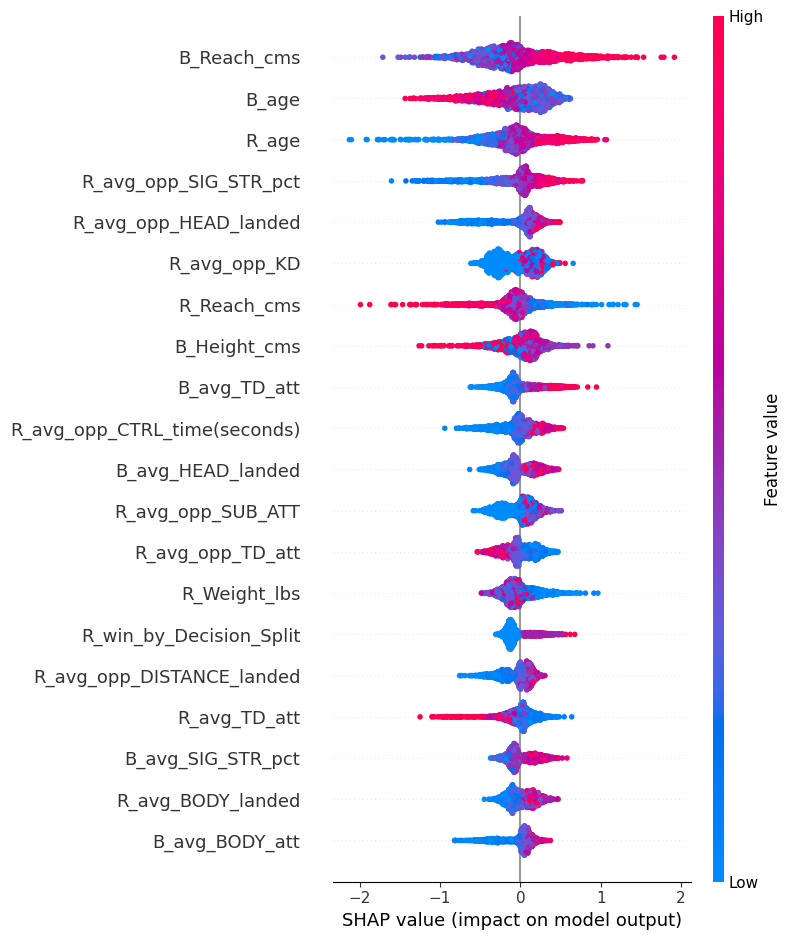

In [83]:
#shapley values for xgb model from voting classifier

explainer = shap.Explainer(voting_clf.estimators_[0])
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=features)


DECREASING THE TEST SIZE


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [85]:
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

In [86]:
xgb_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'alpha': [0, 0.5, 1],
    'lambda': [1, 1.5, 2]
}
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
xgb_grid.fit(X_train_res, y_train_res)
best_xgb = xgb_grid.best_estimator_

Fitting 3 folds for each of 243 candidates, totalling 729 fits


In [87]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_model = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid.fit(X_train_res, y_train_res)
best_rf = rf_grid.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [88]:
lr_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_grid = GridSearchCV(lr_model, lr_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
lr_grid.fit(X_train_res, y_train_res)
best_lr = lr_grid.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [89]:
nb_model = GaussianNB()

#Gradient Boosting Classifier
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5]
}
gb_model = GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(gb_model, gb_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
gb_grid.fit(X_train_res, y_train_res)
best_gb = gb_grid.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [90]:
voting_clf = VotingClassifier(
    estimators=[('xgb', best_xgb), ('rf', best_rf), ('lr', best_lr), ('nb', nb_model), ('gb', best_gb)],
    voting='soft'  
)

#using StratifiedKFold to ensure that each fold has an even distribution
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#eevaluating the ensemble model using cross-validation
cv_results = cross_val_score(voting_clf, X_train_res, y_train_res, cv=kf, scoring='accuracy')

print(f'Cross-validation accuracy scores: {cv_results}')
print(f'Mean cross-validation accuracy: {cv_results.mean()}')
print(f'Standard deviation of cross-validation accuracy: {cv_results.std()}')


C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kisha\

Cross-validation accuracy scores: [0.74647887 0.70422535 0.73591549 0.71478873 0.74955908 0.70723104
 0.72663139 0.70899471 0.68783069 0.71428571]
Mean cross-validation accuracy: 0.7195941078570186
Standard deviation of cross-validation accuracy: 0.018703417351363133


In [91]:
voting_clf.fit(X_train_res, y_train_res)


y_pred_prob = voting_clf.predict_proba(X_test)[:, 1]
y_pred = voting_clf.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred)

# Print test set metrics
print(f'Test set accuracy: {accuracy}')
print(f'Test set precision: {precision}')
print(f'Test set recall: {recall}')
print(f'Test set F1 score: {f1}')
print(f'Test set ROC AUC: {roc_auc}')
print(f'Test set confusion matrix:\n {cm}')


C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test set accuracy: 0.6284840244731476
Test set precision: 0.48589341692789967
Test set recall: 0.586565752128666
Test set F1 score: 0.531504500642949
Test set ROC AUC: 0.6572633121616909
Test set confusion matrix:
 [[1229  656]
 [ 437  620]]


In [92]:
print(f"Number of features: {X_test.shape[1]}")
print(f"Number of feature names: {len(features)}")


Number of features: 159
Number of feature names: 159


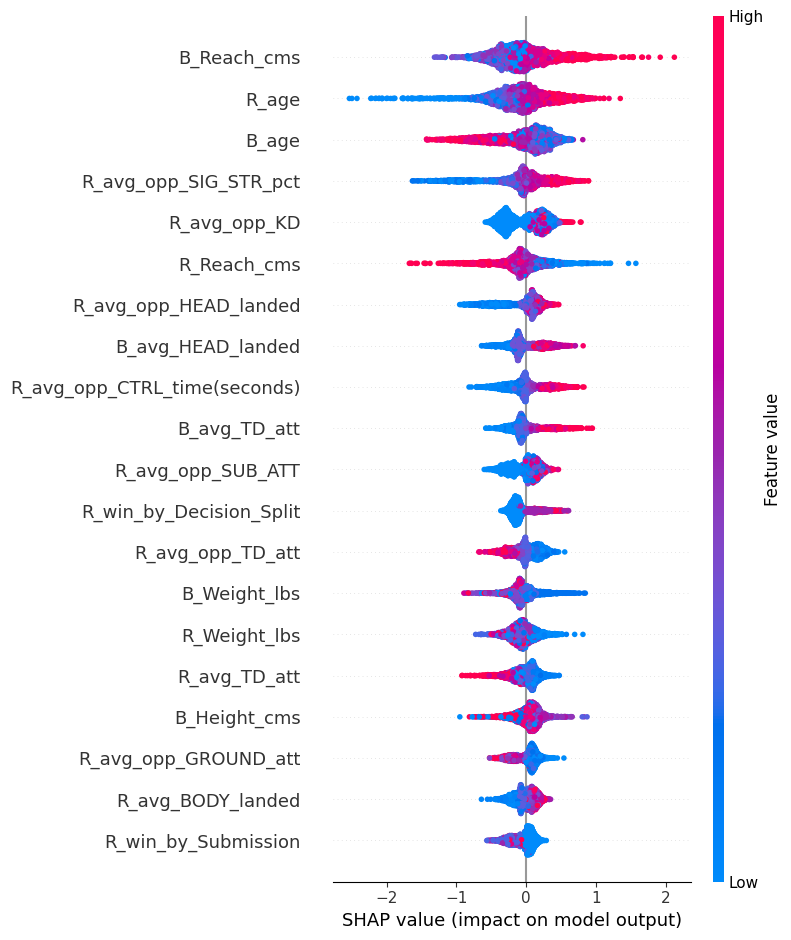

In [93]:
#shapley values for xgb model from voting classifier

explainer = shap.Explainer(voting_clf.estimators_[0])
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=features)


In [94]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7644,7651,7652,7665,7672,7683,7687,7692,7695,7700
Winner,0,0,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
title_bout,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,1,1,2,2,1,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.03125,0.5,0.0,0.0,0.0,0.0,0.03125,0.03125,0.0,0.0
B_avg_opp_KD,0.015625,0.0,0.5,0.25,0.25,0.0,0.0,0.660652,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B_Stance_Switch,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
R_Stance_Open Stance,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
R_Stance_Orthodox,True,True,True,True,True,True,False,True,False,True,...,True,True,False,True,False,False,False,False,False,False
R_Stance_Southpaw,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,True,True,True,True,True


In [95]:
#winner column valuec counts
df['Winner'].value_counts()

Winner
0    4722
1    2631
Name: count, dtype: int64

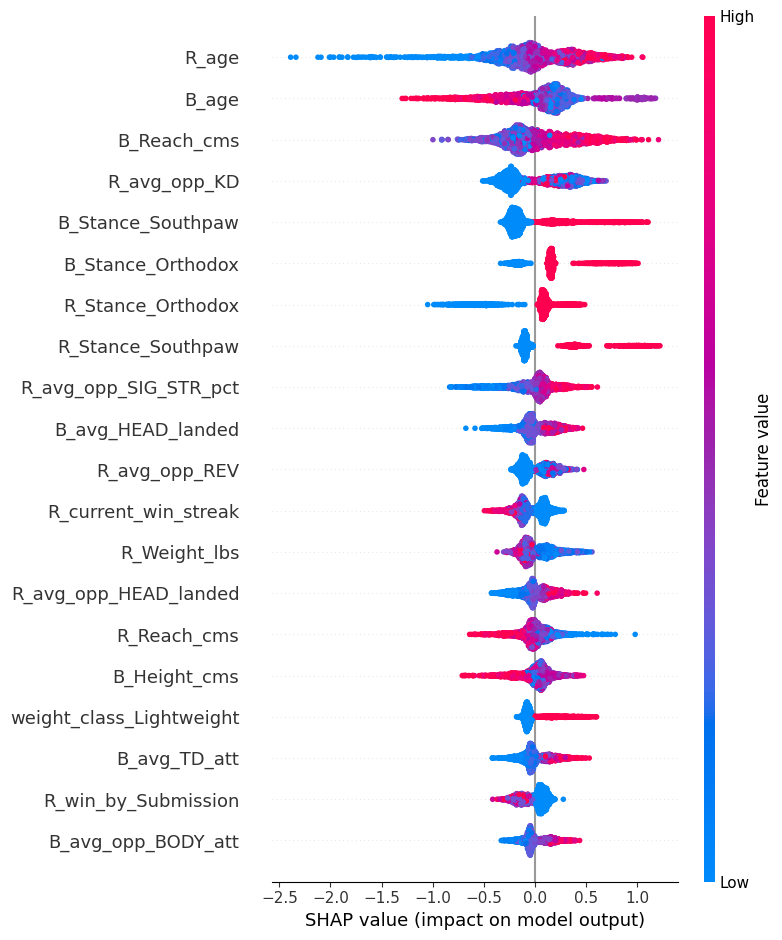

In [105]:
features = df.columns.drop('Winner')


explainer = shap.Explainer(voting_clf.estimators_[0])
shap_values = explainer(X_test_scaled)

shap.summary_plot(shap_values, X_test_scaled, feature_names=features)


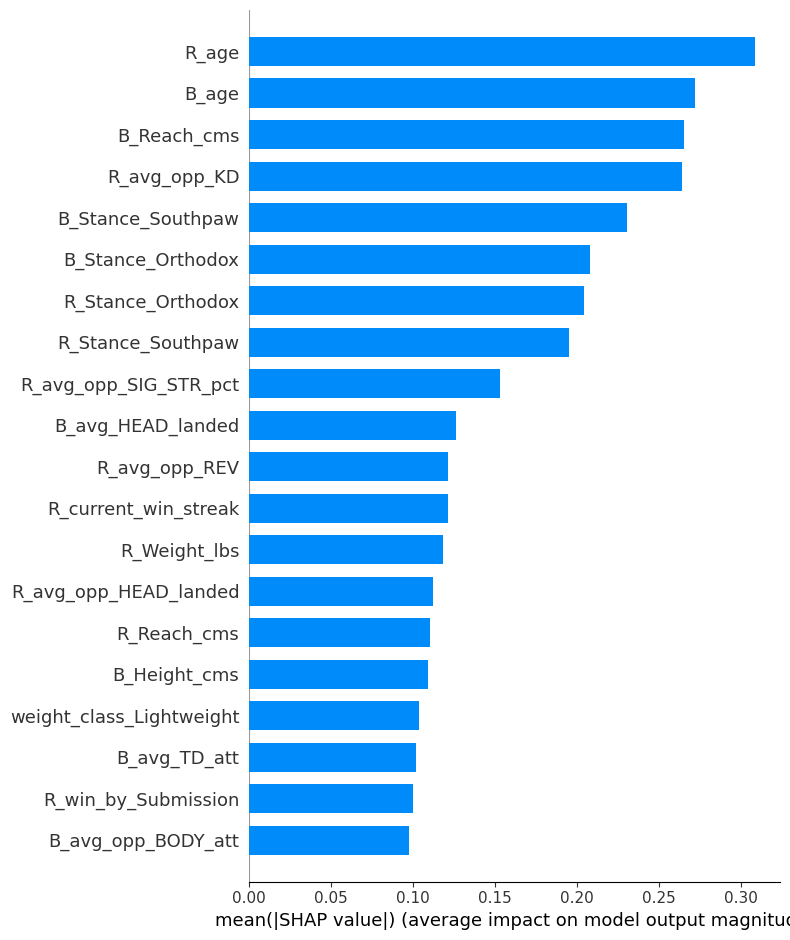

In [106]:
shap.summary_plot(shap_values, X, plot_type="bar")


In [107]:
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of shap_values:", shap_values.values.shape)

Shape of X_test_scaled: (2834, 159)
Shape of shap_values: (2834, 159)


In [108]:
mutual_info = mutual_info_classif(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns)
mutual_info_series.sort_values(ascending=False, inplace=True)
print(mutual_info_series)


R_avg_opp_HEAD_att          0.021775
R_avg_opp_SIG_STR_landed    0.018348
R_avg_SIG_STR_pct           0.014158
R_avg_opp_TOTAL_STR_att     0.014141
B_avg_opp_HEAD_landed       0.013078
                              ...   
B_avg_opp_CLINCH_att        0.000000
B_avg_CLINCH_landed         0.000000
B_avg_CLINCH_att            0.000000
B_avg_opp_LEG_att           0.000000
R_Stance_Switch             0.000000
Length: 159, dtype: float64


In [109]:
features

feature_names = ''.join(str(x) for x in features)

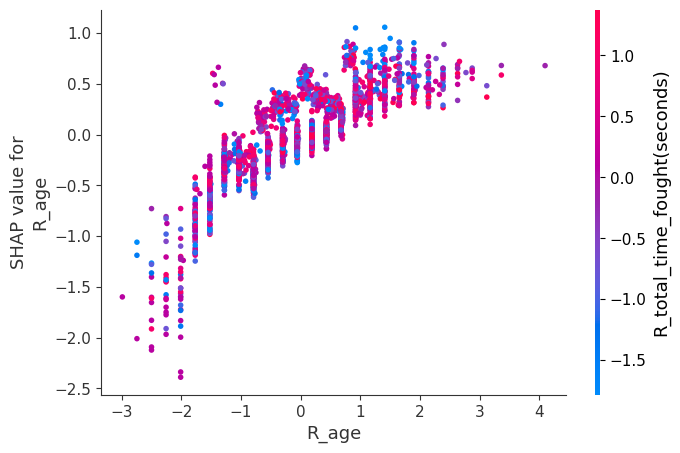

In [110]:
feature_name = "R_age"

shap.dependence_plot(feature_name, shap_values.values, X_test_scaled, feature_names=features)


In [111]:
mean_abs_shap_values = pd.Series(np.abs(shap_values.values).mean(axis=0), index=features)
mean_abs_shap_values.sort_values(ascending=False, inplace=True)


In [112]:
comparison_df = pd.DataFrame({
    'Mutual Information': mutual_info_series,
    'Mean Absolute SHAP': mean_abs_shap_values
})

In [113]:
comparison_df['Mutual Information (normalized)'] = comparison_df['Mutual Information'] / comparison_df['Mutual Information'].max()
comparison_df['Mean Absolute SHAP (normalized)'] = comparison_df['Mean Absolute SHAP'] / comparison_df['Mean Absolute SHAP'].max()


In [114]:
print(comparison_df)

                                    Mutual Information  Mean Absolute SHAP  \
B_Height_cms                                  0.000000            0.108992   
B_Reach_cms                                   0.001424            0.265213   
B_Stance_Open Stance                          0.008946            0.000000   
B_Stance_Orthodox                             0.000000            0.207724   
B_Stance_Sideways                             0.000000            0.000000   
...                                                ...                 ...   
weight_class_Welterweight                     0.000000            0.037093   
weight_class_Women's Bantamweight             0.003330            0.025655   
weight_class_Women's Featherweight            0.000000            0.000000   
weight_class_Women's Flyweight                0.008157            0.008223   
weight_class_Women's Strawweight              0.002663            0.004976   

                                    Mutual Information (normali

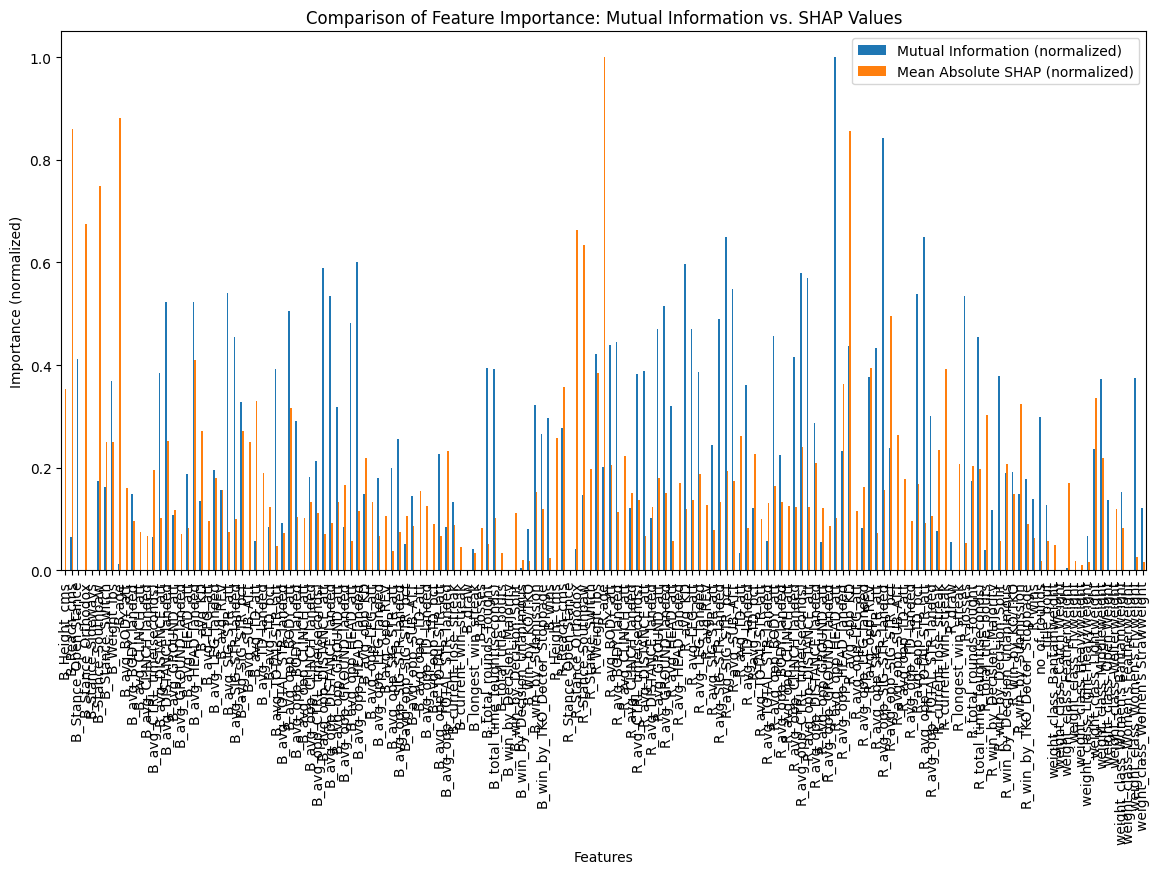

In [115]:
comparison_df[['Mutual Information (normalized)', 'Mean Absolute SHAP (normalized)']].plot(kind='bar', figsize=(14, 7))
plt.title('Comparison of Feature Importance: Mutual Information vs. SHAP Values')
plt.ylabel('Importance (normalized)')
plt.xlabel('Features')
plt.show()

Comparing only top 20 features


In [116]:
top_20_features = comparison_df.nlargest(20, 'Mean Absolute SHAP')

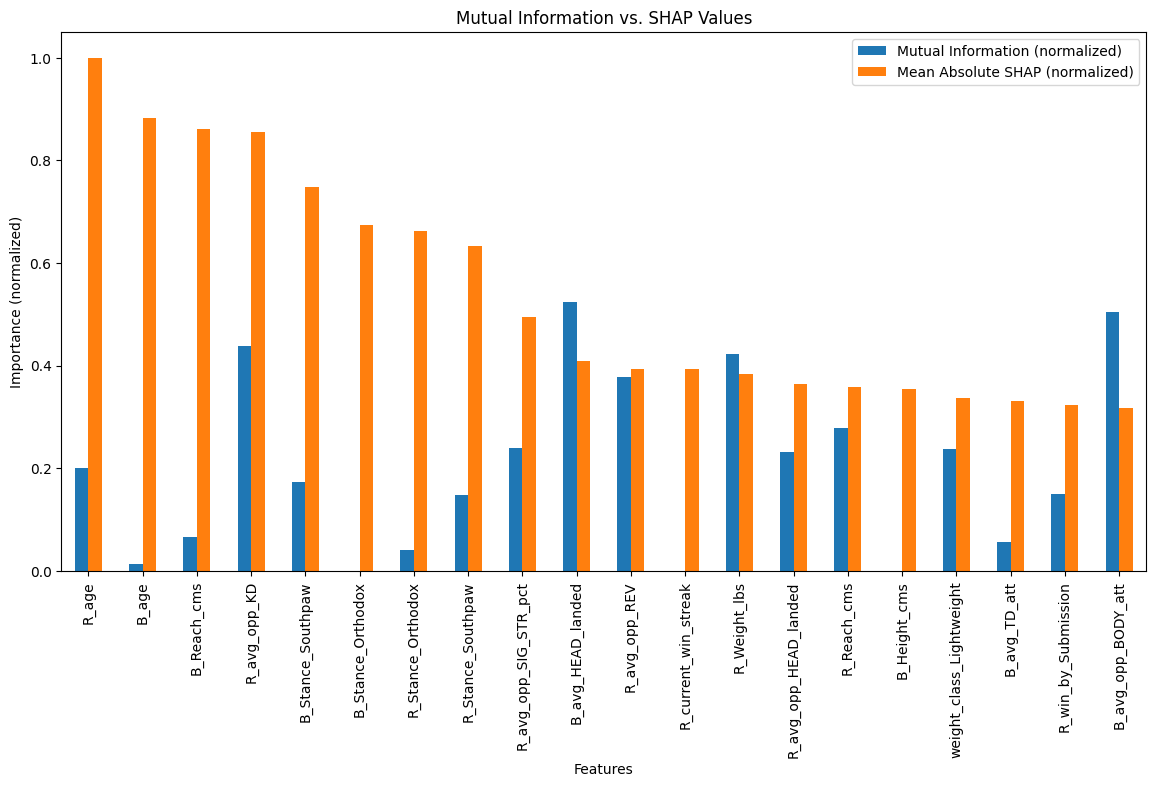

In [117]:
top_20_features[['Mutual Information (normalized)', 'Mean Absolute SHAP (normalized)']].plot(kind='bar', figsize=(14, 7))
plt.title('Mutual Information vs. SHAP Values')
plt.ylabel('Importance (normalized)')
plt.xlabel('Features')
plt.show()

In [125]:
# Assuming df is your original DataFrame
df_new = df.sample(frac=1, random_state=42).reset_index(drop=True)
X = df_new.drop(columns=["Winner"])
y = df_new["Winner"]

# Test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Addressing class imbalance by oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Applying PCA
pca = PCA(n_components=0.95, random_state=42)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Hyperparameter grids
xgb_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'alpha': [0, 0.5, 1],
    'lambda': [1, 1.5, 2]
}
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
lr_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5]
}

# Model initializations and hyperparameter tuning with GridSearchCV
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=3, verbose=2, n_jobs=-1)
xgb_grid.fit(X_train_pca, y_resampled)
best_xgb = xgb_grid.best_estimator_

rf_model = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_params, cv=3, verbose=2, n_jobs=-1)
rf_grid.fit(X_train_pca, y_resampled)
best_rf = rf_grid.best_estimator_

lr_model = LogisticRegression(max_iter=10000, random_state=42)
lr_grid = GridSearchCV(lr_model, lr_params, cv=3, verbose=2, n_jobs=-1)
lr_grid.fit(X_train_pca, y_resampled)
best_lr = lr_grid.best_estimator_

nb_model = GaussianNB()

gb_model = GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(gb_model, gb_params, cv=3, verbose=2, n_jobs=-1)
gb_grid.fit(X_train_pca, y_resampled)
best_gb = gb_grid.best_estimator_

# Voting classifier
voting_clf = VotingClassifier(
    estimators=[('xgb', best_xgb), ('rf', best_rf), ('lr', best_lr), ('nb', nb_model), ('gb', best_gb)],
    voting='soft'
)

# Cross-validation setup with StratifiedKFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate the ensemble model using cross-validation
cv_results = cross_val_score(voting_clf, X_train_pca, y_resampled, cv=kf, scoring='accuracy')

print(f'Cross-validation accuracy scores: {cv_results}')
print(f'Mean cross-validation accuracy: {cv_results.mean()}')
print(f'Standard deviation of cross-validation accuracy: {cv_results.std()}')

# Fit the voting classifier
voting_clf.fit(X_train_pca, y_resampled)

# Predictions
y_pred_prob = voting_clf.predict_proba(X_test_pca)[:, 1]
y_pred = voting_clf.predict(X_test_pca)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred)

print(f'Test set accuracy: {accuracy}')
print(f'Test set precision: {precision}')
print(f'Test set recall: {recall}')
print(f'Test set F1 score: {f1}')
print(f'Test set ROC AUC: {roc_auc}')
print(f'Test set confusion matrix:\n {cm}')


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Cross-validation accuracy scores: [0.68731118 0.70694864 0.69335347 0.68429003 0.74169184 0.70694864
 0.7265861  0.69939577 0.68835098 0.68229955]
Mean cross-validation accuracy: 0.7017176209259064
Standard deviation of cross-validation accuracy: 0.018475529804651194
Test set accuracy: 0.6169537624660019
Test set precision: 0.46649484536082475
Test set recall: 0.45649432534678436
Test set F1 score: 0.461440407903123
Test set ROC AUC: 0.6259173286426081
Test set confusion matrix:
 [[999 414]
 [431 362]]


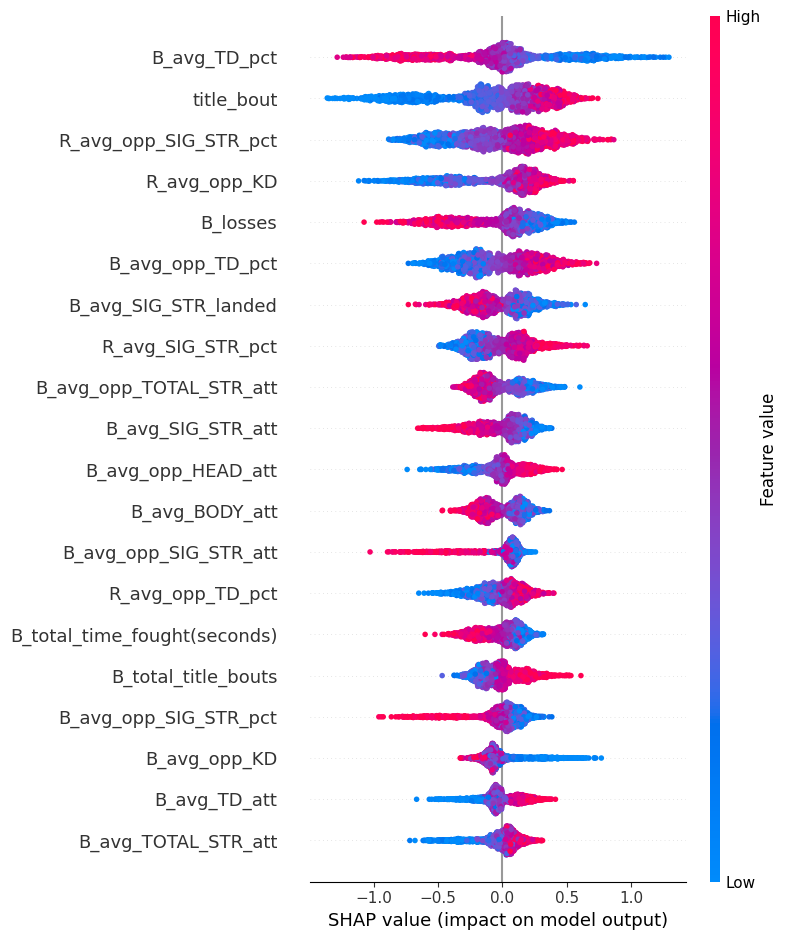

In [128]:
#calculating and plotting shapley values

features = df.columns.drop('Winner')
explainer = shap.Explainer(voting_clf.estimators_[0])
shap_values = explainer(X_test_pca)

shap.summary_plot(shap_values, X_test_pca, feature_names=features)



In [130]:
df_new = df.sample(frac=1, random_state=42).reset_index(drop=True)
X = df_new.drop(columns=["Winner"])
y = df_new["Winner"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

xgb_params = {
    'max_depth': [ 7, 9],
    'learning_rate': [ 0.1, 0.2],
    'n_estimators': [ 300, 400],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'alpha': [0, 0.5, 1],
    'lambda': [1, 1.5, 2]
}
rf_params = {
    'n_estimators': [ 200, 300, 400],
    'max_depth': [20, 30],
    'min_samples_split': [ 5, 10],
    'min_samples_leaf': [ 2, 4],
    'bootstrap': [True, False]
}
lr_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}
gb_params = {
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
xgb_grid.fit(X_train_scaled, y_resampled)
best_xgb = xgb_grid.best_estimator_

rf_model = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid.fit(X_train_scaled, y_resampled)
best_rf = rf_grid.best_estimator_

lr_model = LogisticRegression(max_iter=10000, random_state=42)
lr_grid = GridSearchCV(lr_model, lr_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
lr_grid.fit(X_train_scaled, y_resampled)
best_lr = lr_grid.best_estimator_

nb_model = GaussianNB()

gb_model = GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(gb_model, gb_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
gb_grid.fit(X_train_scaled, y_resampled)
best_gb = gb_grid.best_estimator_

voting_clf = VotingClassifier(
    estimators=[('xgb', best_xgb), ('rf', best_rf), ('lr', best_lr), ('nb', nb_model), ('gb', best_gb)],
    voting='hard'
)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_results = cross_val_score(voting_clf, X_train_scaled, y_resampled, cv=kf, scoring='accuracy')

print(f'Cross-validation accuracy scores: {cv_results}')
print(f'Mean cross-validation accuracy: {cv_results.mean()}')
print(f'Standard deviation of cross-validation accuracy: {cv_results.std()}')

voting_clf.fit(X_train_scaled, y_resampled)

y_pred_prob = voting_clf.predict_proba(X_test_scaled)[:, 1]
y_pred = voting_clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred)

print(f'Test set accuracy: {accuracy}')
print(f'Test set precision: {precision}')
print(f'Test set recall: {recall}')
print(f'Test set F1 score: {f1}')
print(f'Test set ROC AUC: {roc_auc}')
print(f'Test set confusion matrix:\n {cm}')


Fitting 3 folds for each of 1944 candidates, totalling 5832 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Cross-validation accuracy scores: [0.74018127 0.75981873 0.73564955 0.73564955 0.74924471 0.73716012
 0.7734139  0.73716012 0.72768533 0.74432678]
Mean cross-validation accuracy: 0.7440290048493768
Standard deviation of cross-validation accuracy: 0.012871652348080015
Test set accuracy: 0.6287398005439709
Test set precision: 0.4846698113207547
Test set recall: 0.5182849936948297
Test set F1 score: 0.5009140767824497
Test set ROC AUC: 0.6521955646942597
Test set confusion matrix:
 [[976 437]
 [382 411]]


In [232]:
df_new = df.sample(frac=1, random_state=42).reset_index(drop=True)
X = df_new.drop(columns=["Winner"])
y = df_new["Winner"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [134]:

xgb_params = {
    'max_depth': [7, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 300],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'alpha': [0, 0.5, 1],
    'lambda': [1, 1.5, 2]
}
rf_params = {
    'n_estimators': [100, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
xgb_grid.fit(X_train_pca, y_resampled)
best_xgb = xgb_grid.best_estimator_

rf_model = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid.fit(X_train_pca, y_resampled)
best_rf = rf_grid.best_estimator_

# XGBoost evaluation
y_pred_prob_xgb = best_xgb.predict_proba(X_test_pca)[:, 1]
y_pred_xgb = best_xgb.predict(X_test_pca)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

print(f'XGBoost Test set accuracy: {accuracy_xgb}')
print(f'XGBoost Test set precision: {precision_xgb}')
print(f'XGBoost Test set recall: {recall_xgb}')
print(f'XGBoost Test set F1 score: {f1_xgb}')
print(f'XGBoost Test set ROC AUC: {roc_auc_xgb}')
print(f'XGBoost Test set confusion matrix:\n {cm_xgb}')

# Random Forest evaluation
y_pred_prob_rf = best_rf.predict_proba(X_test_pca)[:, 1]
y_pred_rf = best_rf.predict(X_test_pca)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print(f'Random Forest Test set accuracy: {accuracy_rf}')
print(f'Random Forest Test set precision: {precision_rf}')
print(f'Random Forest Test set recall: {recall_rf}')
print(f'Random Forest Test set F1 score: {f1_rf}')
print(f'Random Forest Test set ROC AUC: {roc_auc_rf}')
print(f'Random Forest Test set confusion matrix:\n {cm_rf}')


Fitting 3 folds for each of 1296 candidates, totalling 3888 fits
Fitting 3 folds for each of 144 candidates, totalling 432 fits
XGBoost Test set accuracy: 0.6305530371713509
XGBoost Test set precision: 0.48242811501597443
XGBoost Test set recall: 0.38083228247162676
XGBoost Test set F1 score: 0.42565186751233264
XGBoost Test set ROC AUC: 0.6346704934989367
XGBoost Test set confusion matrix:
 [[1089  324]
 [ 491  302]]
Random Forest Test set accuracy: 0.6387126019945603
Random Forest Test set precision: 0.49640287769784175
Random Forest Test set recall: 0.3480453972257251
Random Forest Test set F1 score: 0.40919199406968126
Random Forest Test set ROC AUC: 0.6348592470029246
Random Forest Test set confusion matrix:
 [[1133  280]
 [ 517  276]]


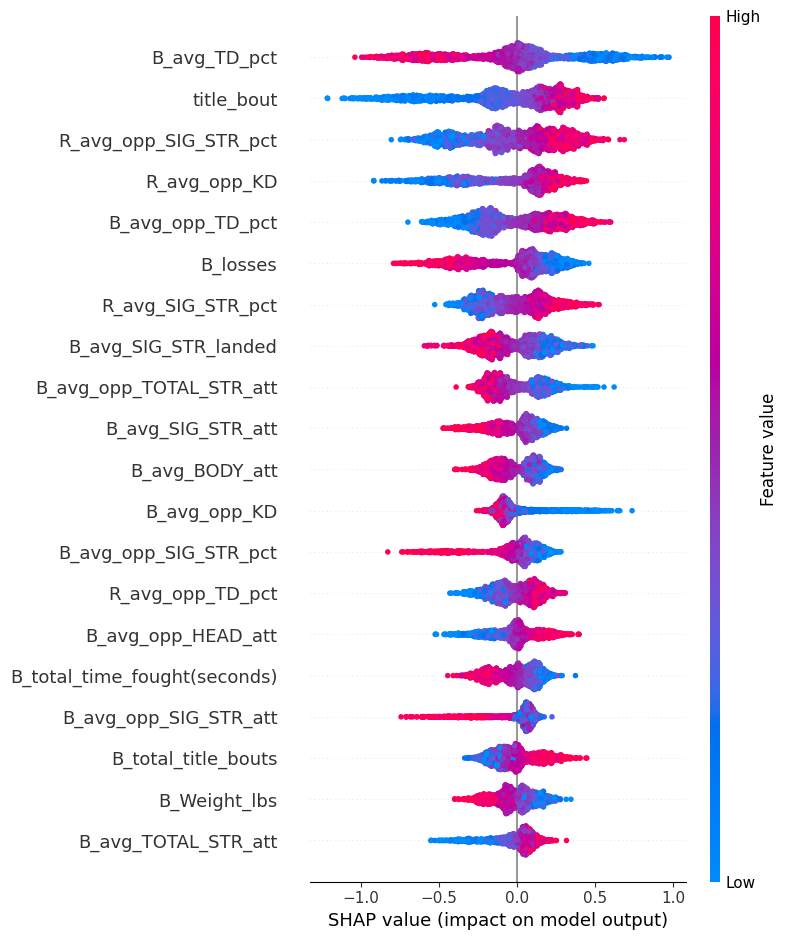

In [235]:
#shapley values for xgb model from voting classifier

explainer = shap.Explainer(best_xgb)
shap_values = explainer(X_test_pca)

shap.summary_plot(shap_values, X_test_pca, feature_names=features)

